In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from matplotlib.patches import Polygon

In [388]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks

In [ ]:
To Do:
    #classify areas by urbanity: 
    https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/239074/2001-classification_parlia-constituencies-method.pdf
    https://commonslibrary.parliament.uk/research-briefings/cbp-8322/
    #add age data
    #add inequality 
    https://fingertips.phe.org.uk/profile/health-profiles/data#page/0
        
Current problems:
    #encode categorical y. See how it correlates
    #decision tree
    #consider unemployment
    
    
Done:
    #merging and cleaning el_2015 and eu_2016
    #cut house prices to one year
    #filled in missing Scottish and N Irish averages
    #add average houseprice
    #add ethnic diversity
    #add age data
    #replacing 0s in counties
    #split into test and train 
sources:
    housing - 
    - Scotland https://www.ros.gov.uk/data-and-statistics/house-price-statistics
    - NI https://www.newsletter.co.uk/news/revealed-cheapest-place-buy-house-northern-ireland-1047102
        
    ethnicity
    - https://commonslibrary.parliament.uk/constituency-statistics-ethnicity/#compare_constituencies

## Reading files

In [2]:
all_elections = pd.ExcelFile('1918-2019election_results_by_pcon.xlsx')

In [3]:
e_2015 = pd.read_excel(all_elections, '2015')

In [4]:
eu_2016 = pd.read_excel('eu_referendum_results.xlsx')

In [5]:
eu_2016.shape

(652, 7)

In [141]:
sizes2 = pd.read_csv('pcon-classification-csv.csv')

In [7]:
house_prices = pd.ExcelFile('House-prices.xlsx')
median_price = pd.read_excel(house_prices, 'Constituency data table')

In [8]:
ethnicity = pd.ExcelFile('Ethnic-group.xlsx')
ethnicity_df = pd.read_excel(ethnicity, 'Constituency data')

In [9]:
age = pd.ExcelFile('population-by-age.xlsx')
av_age = pd.read_excel(age, 'Age group data')

In [341]:
eng_dep = pd.ExcelFile('CBP7327.xlsx')

In [342]:
english_dep = pd.read_excel(eng_dep, '2019 Ranks')

In [391]:
qualifications = pd.read_excel('UK by qualifications.xlsx')

## cleaning

### data from the 2015 general election

In [10]:
e_2015['Country/Region'].value_counts()

South East                  84
North West                  75
London                      73
West Midlands               59
Scotland                    59
Eastern                     58
South West                  55
Yorkshire and The Humber    54
East Midlands               46
Wales                       40
North East                  29
Northern Ireland            18
Name: Country/Region, dtype: int64

In [11]:
e_2015.shape

(669, 49)

In [12]:
e_2015['County'].value_counts()

London                    73
West Midlands             28
Greater Manchester        27
West Yorkshire            22
Hampshire                 18
Essex                     18
Kent                      17
Lancashire                16
Merseyside                15
South Yorkshire           14
Tyne and Wear             12
Staffordshire             12
Devon                     12
Surrey                    11
Cheshire                  11
Hertfordshire             11
Nottinghamshire           11
Avon                      11
Derbyshire                11
Leicestershire            10
Humberside                10
Norfolk                    9
Berkshire                  8
Hereford and Worcester     8
North Yorkshire            8
West Sussex                8
Dorset                     8
East Sussex                8
Northamptonshire           7
Wiltshire                  7
Lincolnshire               7
Buckinghamshire            7
Cambridgeshire             7
Durham                     7
Suffolk       

In [13]:
e_2015[e_2015['County'].isna()]

,Unnamed: 0,Unnamed: 1,Constituency,County,Country/Region,Country,Electorate,Unnamed: 7,Votes,Vote share,Unnamed: 10,Votes,Vote share.1,Unnamed: 13,Votes.1,Vote share.2,Unnamed: 16,Votes.2,Vote share.3,Unnamed: 19,Votes.3,Vote share.4,Unnamed: 22,Votes.4,Vote share.5,Unnamed: 25,Votes.5,Vote share.6,Unnamed: 28,Votes.6,Vote share.7,Unnamed: 31,Votes.7,Vote share.8,Unnamed: 34,Votes.8,Vote share.9,Unnamed: 37,Votes.9,Vote share.10,Unnamed: 40,Votes.10,Vote share.11,Unnamed: 43,Votes.11,Votes Share,Unnamed: 46,Total votes,Turnout
533,NaN,N06000001,BELFAST EAST,NaN,Northern Ireland,Northern Ireland,63157.0,NaN,1121.0,0.028250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1058.0,0.026662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19575.0,0.493297,NaN,823.0,0.020740,NaN,127.0,0.003200,NaN,NaN,0.000000,NaN,16978.0,0.427851,NaN,NaN,NaN,NaN,39682.0,0.628307
534,NaN,N06000002,BELFAST NORTH,NaN,Northern Ireland,Northern Ireland,68553.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19096.0,0.470426,NaN,13770.0,0.339221,NaN,3338.0,0.082231,NaN,NaN,0.000000,NaN,2941.0,0.072451,NaN,1448.0,0.035671,NaN,40593.0,0.592140
535,NaN,N06000003,BELFAST SOUTH,NaN,Northern Ireland,Northern Ireland,64927.0,NaN,582.0,0.014940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.0,0.048772,NaN,2238.0,0.057448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8654.0,0.222142,NaN,5402.0,0.138666,NaN,9560.0,0.245399,NaN,3549.0,0.091100,NaN,6711.0,0.172267,NaN,361.0,0.009267,NaN,38957.0,0.600012
536,NaN,N06000004,BELFAST WEST,NaN,Northern Ireland,Northern Ireland,62697.0,NaN,34.0,0.000962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765.0,0.021654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2773.0,0.078491,NaN,19163.0,0.542416,NaN,3475.0,0.098361,NaN,1088.0,0.030796,NaN,636.0,0.018002,NaN,7395.0,0.209318,NaN,35329.0,0.563488
537,NaN,N06000005,ANTRIM EAST,NaN,Northern Ireland,Northern Ireland,62811.0,NaN,549.0,0.016390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3660.0,0.109264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12103.0,0.361316,NaN,2314.0,0.069081,NaN,1639.0,0.048930,NaN,6308.0,0.188315,NaN,5021.0,0.149894,NaN,1903.0,0.056811,NaN,33497.0,0.533298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,"North West = constituencies within Cheshire, C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,"South East = constituencies within Berkshire, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,"South West = constituencies within Avon, Cornw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,NaN,NaN,West Midlands = constituencies within Hereford...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
e_2015['Constituency'].value_counts()

CHICHESTER                                                                                                                                  1
BIRKENHEAD                                                                                                                                  1
MIDLOTHIAN                                                                                                                                  1
HOUGHTON & SUNDERLAND SOUTH                                                                                                                 1
WALSALL NORTH                                                                                                                               1
                                                                                                                                           ..
West Midlands = constituencies within Hereford and Worcester, Shropshire, Staffordshire, Warwickshire, and West Midlands local authority    1
BRECON

In [15]:
#I need to rename the columns
new_cols = [col.lower() for col in e_2015]
e_2015.columns = new_cols
e_2015.columns

Index(['unnamed: 0', 'unnamed: 1', 'constituency', 'county', 'country/region',
       'country', 'electorate', 'unnamed: 7', 'votes', 'vote share',
       'unnamed: 10', 'votes ', 'vote share.1', 'unnamed: 13', 'votes.1',
       'vote share.2', 'unnamed: 16', 'votes.2', 'vote share.3', 'unnamed: 19',
       'votes.3', 'vote share.4', 'unnamed: 22', 'votes.4', 'vote share.5',
       'unnamed: 25', 'votes.5', 'vote share.6', 'unnamed: 28', 'votes.6',
       'vote share.7', 'unnamed: 31', 'votes.7', 'vote share.8', 'unnamed: 34',
       'votes.8', 'vote share.9', 'unnamed: 37', 'votes.9', 'vote share.10',
       'unnamed: 40', 'votes.10', 'vote share.11', 'unnamed: 43', 'votes.11',
       'votes share', 'unnamed: 46', 'total votes', 'turnout '],
      dtype='object')

In [16]:
e_2015.rename(columns={'unnamed: 1': 'ons_id',
                       'country/region': 'region',
                       'votes': 'con_votes_15',
                       'vote share': 'con_share_15',
                       'votes ': 'lib_votes_15',
                       'vote share.1': 'lib_share_15',
                       'votes.1': 'lab_votes_15',
                       'vote share.2': 'lab_share_15',
                       'votes.2': 'ukip_votes_15',
                       'vote share.3': 'ukip_share_15',
                       'votes.3': 'green_votes_15',
                       'vote share.4': 'green_share_15',
                       'votes.4': 'snp_15',
                       'vote share.5': 'snp_share_15',
                       'votes.5': 'plaid_cymru_votes_15',
                       'vote share.6': 'plaid_cymru_share_15',
                       'votes.6': 'dup_votes_15',
                       'vote share.7': 'dup_share_15',
                       'votes.7': 'sinn_fein_votes_15',
                       'vote share.8': 'sinn_fein_share_15',
                       'votes.8': 'sdlp_votes_15',
                       'vote share.9': 'sdlp_share_15',
                       'votes.9': 'uup_votes_15',
                       'vote share.10': 'uup_share_15',
                       'votes.10': 'alliance_votes_15',
                       'vote share.11': 'alliance_share_15',
                       'votes.11': 'other_vote_15',
                       'votes share': 'other_share_15',
                       }, inplace=True)
#con, lib, lab, ukip, green, snp, plaid cymru, dup, sinn fein, SDLP, UUP, Alliance, Other

In [17]:
e_2015.head()

,unnamed: 0,ons_id,constituency,county,region,country,electorate,unnamed: 7,con_votes_15,con_share_15,unnamed: 10,lib_votes_15,lib_share_15,unnamed: 13,lab_votes_15,lab_share_15,unnamed: 16,ukip_votes_15,ukip_share_15,unnamed: 19,green_votes_15,green_share_15,unnamed: 22,snp_15,snp_share_15,unnamed: 25,plaid_cymru_votes_15,plaid_cymru_share_15,unnamed: 28,dup_votes_15,dup_share_15,unnamed: 31,sinn_fein_votes_15,sinn_fein_share_15,unnamed: 34,sdlp_votes_15,sdlp_share_15,unnamed: 37,uup_votes_15,uup_share_15,unnamed: 40,alliance_votes_15,alliance_share_15,unnamed: 43,other_vote_15,other_share_15,unnamed: 46,total votes,turnout
0,NaN,E14000530,ALDERSHOT,Hampshire,South East,England,72430.0,NaN,23369.0,0.505921,NaN,4076.0,0.088242,NaN,8468.0,0.183326,NaN,8253.0,0.178671,NaN,2025.0,0.043840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46191.0,0.637733
1,NaN,E14000531,ALDRIDGE-BROWNHILLS,West Midlands,West Midlands,England,60215.0,NaN,20558.0,0.520495,NaN,1330.0,0.033673,NaN,8835.0,0.223688,NaN,7751.0,0.196243,NaN,826.0,0.020913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.0,0.004988,NaN,39497.0,0.655933
2,NaN,E14000532,ALTRINCHAM & SALE WEST,Greater Manchester,North West,England,71511.0,NaN,26771.0,0.529940,NaN,4235.0,0.083833,NaN,13481.0,0.266861,NaN,4047.0,0.080112,NaN,1983.0,0.039254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50517.0,0.706423
3,NaN,E14000533,AMBER VALLEY,Derbyshire,East Midlands,England,69510.0,NaN,20106.0,0.439793,NaN,1360.0,0.029748,NaN,15901.0,0.347814,NaN,7263.0,0.158869,NaN,1087.0,0.023777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45717.0,0.657704
4,NaN,E14000534,ARUNDEL & SOUTH DOWNS,West Sussex,South East,England,77242.0,NaN,34331.0,0.607876,NaN,4062.0,0.071923,NaN,6324.0,0.111975,NaN,8154.0,0.144377,NaN,3606.0,0.063849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56477.0,0.731170


In [ ]:
#I need to make the dfs have the same number of rows before I can concatenate them 

In [18]:
e_2015.dropna(
    axis=0,
    how='all',
    thresh=None,
    subset=None,
    inplace=True
)

In [19]:
e_2015.shape

(666, 49)

In [20]:
e_2015['ons_id'].isna().sum()

16

In [21]:
e_2015.dropna(subset=['ons_id'], inplace=True)

In [22]:
e_2015.shape

(650, 49)

### data from the 2016 referendum 

In [23]:
eu_2016.head()

,Unnamed: 0,ONS ID,Constituency,CH leave estimate,Known result,Known leave,LEAVE FIGURE TO USE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,E14000582,Boston and Skegness,0.756,No,0.000,0.756
3,NaN,E14001011,Walsall North,0.712,Yes,0.742,0.742
4,NaN,E14000642,Clacton,0.730,No,0.000,0.730


In [24]:
eu_2016.dropna(
    axis=0,
    how='all',
    inplace=True)

In [25]:
eu_2016.shape

(650, 7)

In [26]:
# ok, they have the same number of rows.
eu_2016.columns

Index(['Unnamed: 0', 'ONS ID', 'Constituency', 'CH leave estimate',
       'Known result', 'Known leave', 'LEAVE FIGURE TO USE'],
      dtype='object')

In [27]:
#drop unnecessary columns from eu table

eu_2016.drop(columns = ['Unnamed: 0', 'CH leave estimate', 'Known result', 'Known leave'],
            inplace = True)

In [28]:
eu_2016.head()

,ONS ID,Constituency,LEAVE FIGURE TO USE
2,E14000582,Boston and Skegness,0.756
3,E14001011,Walsall North,0.742
4,E14000642,Clacton,0.730
5,E14000933,South Basildon and East Thurrock,0.730
6,E14000771,Kingston upon Hull East,0.728


In [29]:
#drop unnecessary columns from 2015 table

e_2015.head()

,unnamed: 0,ons_id,constituency,county,region,country,electorate,unnamed: 7,con_votes_15,con_share_15,unnamed: 10,lib_votes_15,lib_share_15,unnamed: 13,lab_votes_15,lab_share_15,unnamed: 16,ukip_votes_15,ukip_share_15,unnamed: 19,green_votes_15,green_share_15,unnamed: 22,snp_15,snp_share_15,unnamed: 25,plaid_cymru_votes_15,plaid_cymru_share_15,unnamed: 28,dup_votes_15,dup_share_15,unnamed: 31,sinn_fein_votes_15,sinn_fein_share_15,unnamed: 34,sdlp_votes_15,sdlp_share_15,unnamed: 37,uup_votes_15,uup_share_15,unnamed: 40,alliance_votes_15,alliance_share_15,unnamed: 43,other_vote_15,other_share_15,unnamed: 46,total votes,turnout
0,NaN,E14000530,ALDERSHOT,Hampshire,South East,England,72430.0,NaN,23369.0,0.505921,NaN,4076.0,0.088242,NaN,8468.0,0.183326,NaN,8253.0,0.178671,NaN,2025.0,0.043840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46191.0,0.637733
1,NaN,E14000531,ALDRIDGE-BROWNHILLS,West Midlands,West Midlands,England,60215.0,NaN,20558.0,0.520495,NaN,1330.0,0.033673,NaN,8835.0,0.223688,NaN,7751.0,0.196243,NaN,826.0,0.020913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.0,0.004988,NaN,39497.0,0.655933
2,NaN,E14000532,ALTRINCHAM & SALE WEST,Greater Manchester,North West,England,71511.0,NaN,26771.0,0.529940,NaN,4235.0,0.083833,NaN,13481.0,0.266861,NaN,4047.0,0.080112,NaN,1983.0,0.039254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50517.0,0.706423
3,NaN,E14000533,AMBER VALLEY,Derbyshire,East Midlands,England,69510.0,NaN,20106.0,0.439793,NaN,1360.0,0.029748,NaN,15901.0,0.347814,NaN,7263.0,0.158869,NaN,1087.0,0.023777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45717.0,0.657704
4,NaN,E14000534,ARUNDEL & SOUTH DOWNS,West Sussex,South East,England,77242.0,NaN,34331.0,0.607876,NaN,4062.0,0.071923,NaN,6324.0,0.111975,NaN,8154.0,0.144377,NaN,3606.0,0.063849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56477.0,0.731170


In [30]:
list(e_2015.columns)

['unnamed: 0',
 'ons_id',
 'constituency',
 'county',
 'region',
 'country',
 'electorate',
 'unnamed: 7',
 'con_votes_15',
 'con_share_15',
 'unnamed: 10',
 'lib_votes_15',
 'lib_share_15',
 'unnamed: 13',
 'lab_votes_15',
 'lab_share_15',
 'unnamed: 16',
 'ukip_votes_15',
 'ukip_share_15',
 'unnamed: 19',
 'green_votes_15',
 'green_share_15',
 'unnamed: 22',
 'snp_15',
 'snp_share_15',
 'unnamed: 25',
 'plaid_cymru_votes_15',
 'plaid_cymru_share_15',
 'unnamed: 28',
 'dup_votes_15',
 'dup_share_15',
 'unnamed: 31',
 'sinn_fein_votes_15',
 'sinn_fein_share_15',
 'unnamed: 34',
 'sdlp_votes_15',
 'sdlp_share_15',
 'unnamed: 37',
 'uup_votes_15',
 'uup_share_15',
 'unnamed: 40',
 'alliance_votes_15',
 'alliance_share_15',
 'unnamed: 43',
 'other_vote_15',
 'other_share_15',
 'unnamed: 46',
 'total votes',
 'turnout ']

In [31]:
el_2015 = e_2015[e_2015.columns.drop(list(e_2015.filter(regex='unnamed:'))).drop('constituency')]

In [32]:
el_2015.shape

(650, 33)

In [33]:
el_2015.head()

,ons_id,county,region,country,electorate,con_votes_15,con_share_15,lib_votes_15,lib_share_15,lab_votes_15,lab_share_15,ukip_votes_15,ukip_share_15,green_votes_15,green_share_15,snp_15,snp_share_15,plaid_cymru_votes_15,plaid_cymru_share_15,dup_votes_15,dup_share_15,sinn_fein_votes_15,sinn_fein_share_15,sdlp_votes_15,sdlp_share_15,uup_votes_15,uup_share_15,alliance_votes_15,alliance_share_15,other_vote_15,other_share_15,total votes,turnout
0,E14000530,Hampshire,South East,England,72430.0,23369.0,0.505921,4076.0,0.088242,8468.0,0.183326,8253.0,0.178671,2025.0,0.043840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46191.0,0.637733
1,E14000531,West Midlands,West Midlands,England,60215.0,20558.0,0.520495,1330.0,0.033673,8835.0,0.223688,7751.0,0.196243,826.0,0.020913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.0,0.004988,39497.0,0.655933
2,E14000532,Greater Manchester,North West,England,71511.0,26771.0,0.529940,4235.0,0.083833,13481.0,0.266861,4047.0,0.080112,1983.0,0.039254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50517.0,0.706423
3,E14000533,Derbyshire,East Midlands,England,69510.0,20106.0,0.439793,1360.0,0.029748,15901.0,0.347814,7263.0,0.158869,1087.0,0.023777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45717.0,0.657704
4,E14000534,West Sussex,South East,England,77242.0,34331.0,0.607876,4062.0,0.071923,6324.0,0.111975,8154.0,0.144377,3606.0,0.063849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56477.0,0.731170


In [ ]:
# now I need to replace the nans with 0s

In [34]:
el_2015.isna().sum()/el_2015.shape[0] 
#some of the counties are nans. I need to fill them in

ons_id                  0.000000
county                  0.180000
region                  0.000000
country                 0.000000
electorate              0.000000
con_votes_15            0.004615
con_share_15            0.004615
lib_votes_15            0.029231
lib_share_15            0.029231
lab_votes_15            0.029231
lab_share_15            0.029231
ukip_votes_15           0.040000
ukip_share_15           0.040000
green_votes_15          0.118462
green_share_15          0.118462
snp_15                  0.909231
snp_share_15            0.909231
plaid_cymru_votes_15    0.938462
plaid_cymru_share_15    0.938462
dup_votes_15            0.975385
dup_share_15            0.975385
sinn_fein_votes_15      0.972308
sinn_fein_share_15      0.972308
sdlp_votes_15           0.972308
sdlp_share_15           0.972308
uup_votes_15            0.976923
uup_share_15            0.972308
alliance_votes_15       0.972308
alliance_share_15       0.972308
other_vote_15           0.396923
other_shar

In [35]:
el_2015= el_2015.fillna(0)

In [36]:
el_2015

,ons_id,county,region,country,electorate,con_votes_15,con_share_15,lib_votes_15,lib_share_15,lab_votes_15,lab_share_15,ukip_votes_15,ukip_share_15,green_votes_15,green_share_15,snp_15,snp_share_15,plaid_cymru_votes_15,plaid_cymru_share_15,dup_votes_15,dup_share_15,sinn_fein_votes_15,sinn_fein_share_15,sdlp_votes_15,sdlp_share_15,uup_votes_15,uup_share_15,alliance_votes_15,alliance_share_15,other_vote_15,other_share_15,total votes,turnout
0,E14000530,Hampshire,South East,England,72430.0,23369.0,0.505921,4076.0,0.088242,8468.0,0.183326,8253.0,0.178671,2025.0,0.043840,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,46191.0,0.637733
1,E14000531,West Midlands,West Midlands,England,60215.0,20558.0,0.520495,1330.0,0.033673,8835.0,0.223688,7751.0,0.196243,826.0,0.020913,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,0.004988,39497.0,0.655933
2,E14000532,Greater Manchester,North West,England,71511.0,26771.0,0.529940,4235.0,0.083833,13481.0,0.266861,4047.0,0.080112,1983.0,0.039254,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,50517.0,0.706423
3,E14000533,Derbyshire,East Midlands,England,69510.0,20106.0,0.439793,1360.0,0.029748,15901.0,0.347814,7263.0,0.158869,1087.0,0.023777,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,45717.0,0.657704
4,E14000534,West Sussex,South East,England,77242.0,34331.0,0.607876,4062.0,0.071923,6324.0,0.111975,8154.0,0.144377,3606.0,0.063849,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,56477.0,0.731170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,W07000076,0,Wales,Wales,63603.0,6683.0,0.165901,935.0,0.023211,17864.0,0.443463,7791.0,0.193407,937.0,0.023260,0.0,0.0,5895.0,0.146340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,0.004419,40283.0,0.633351
646,W07000077,0,Wales,Wales,55697.0,5366.0,0.151578,950.0,0.026835,17336.0,0.489704,6932.0,0.195814,659.0,0.018615,0.0,0.0,3794.0,0.107172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364.0,0.010282,35401.0,0.635600
647,W07000078,0,Wales,Wales,72794.0,23607.0,0.460238,1309.0,0.025520,16727.0,0.326107,5489.0,0.107013,1054.0,0.020549,0.0,0.0,2869.0,0.055934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0,0.004640,51293.0,0.704632
648,W07000079,0,Wales,Wales,66762.0,11014.0,0.251507,2069.0,0.047246,17803.0,0.406535,4923.0,0.112418,1704.0,0.038911,0.0,0.0,6096.0,0.139204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,0.004179,43792.0,0.655942


In [37]:
#deal with empty counties. There are 117. The Welsh, N Irish and Scottish ones.
el_2015['county'].value_counts()

0                         117
London                     73
West Midlands              28
Greater Manchester         27
West Yorkshire             22
Essex                      18
Hampshire                  18
Kent                       17
Lancashire                 16
Merseyside                 15
South Yorkshire            14
Tyne and Wear              12
Devon                      12
Staffordshire              12
Derbyshire                 11
Cheshire                   11
Hertfordshire              11
Nottinghamshire            11
Avon                       11
Surrey                     11
Leicestershire             10
Humberside                 10
Norfolk                     9
Berkshire                   8
Hereford and Worcester      8
North Yorkshire             8
West Sussex                 8
Dorset                      8
East Sussex                 8
Wiltshire                   7
Northamptonshire            7
Buckinghamshire             7
Cambridgeshire              7
Durham    

In [38]:
list(el_2015['county'].str.contains('0'))

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [39]:
el_2015.tail(117)

,ons_id,county,region,country,electorate,con_votes_15,con_share_15,lib_votes_15,lib_share_15,lab_votes_15,lab_share_15,ukip_votes_15,ukip_share_15,green_votes_15,green_share_15,snp_15,snp_share_15,plaid_cymru_votes_15,plaid_cymru_share_15,dup_votes_15,dup_share_15,sinn_fein_votes_15,sinn_fein_share_15,sdlp_votes_15,sdlp_share_15,uup_votes_15,uup_share_15,alliance_votes_15,alliance_share_15,other_vote_15,other_share_15,total votes,turnout
533,N06000001,0,Northern Ireland,Northern Ireland,63157.0,1121.0,0.028250,0.0,0.000000,0.0,0.000000,0.0,0.000000,1058.0,0.026662,0.0,0.0,0.0,0.000000,19575.0,0.493297,823.0,0.020740,127.0,0.003200,0.0,0.000000,16978.0,0.427851,0.0,0.000000,39682.0,0.628307
534,N06000002,0,Northern Ireland,Northern Ireland,68553.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,19096.0,0.470426,13770.0,0.339221,3338.0,0.082231,0.0,0.000000,2941.0,0.072451,1448.0,0.035671,40593.0,0.592140
535,N06000003,0,Northern Ireland,Northern Ireland,64927.0,582.0,0.014940,0.0,0.000000,0.0,0.000000,1900.0,0.048772,2238.0,0.057448,0.0,0.0,0.0,0.000000,8654.0,0.222142,5402.0,0.138666,9560.0,0.245399,3549.0,0.091100,6711.0,0.172267,361.0,0.009267,38957.0,0.600012
536,N06000004,0,Northern Ireland,Northern Ireland,62697.0,34.0,0.000962,0.0,0.000000,0.0,0.000000,765.0,0.021654,0.0,0.000000,0.0,0.0,0.0,0.000000,2773.0,0.078491,19163.0,0.542416,3475.0,0.098361,1088.0,0.030796,636.0,0.018002,7395.0,0.209318,35329.0,0.563488
537,N06000005,0,Northern Ireland,Northern Ireland,62811.0,549.0,0.016390,0.0,0.000000,0.0,0.000000,3660.0,0.109264,0.0,0.000000,0.0,0.0,0.0,0.000000,12103.0,0.361316,2314.0,0.069081,1639.0,0.048930,6308.0,0.188315,5021.0,0.149894,1903.0,0.056811,33497.0,0.533298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,W07000076,0,Wales,Wales,63603.0,6683.0,0.165901,935.0,0.023211,17864.0,0.443463,7791.0,0.193407,937.0,0.023260,0.0,0.0,5895.0,0.146340,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,178.0,0.004419,40283.0,0.633351
646,W07000077,0,Wales,Wales,55697.0,5366.0,0.151578,950.0,0.026835,17336.0,0.489704,6932.0,0.195814,659.0,0.018615,0.0,0.0,3794.0,0.107172,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,364.0,0.010282,35401.0,0.635600
647,W07000078,0,Wales,Wales,72794.0,23607.0,0.460238,1309.0,0.025520,16727.0,0.326107,5489.0,0.107013,1054.0,0.020549,0.0,0.0,2869.0,0.055934,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,238.0,0.004640,51293.0,0.704632
648,W07000079,0,Wales,Wales,66762.0,11014.0,0.251507,2069.0,0.047246,17803.0,0.406535,4923.0,0.112418,1704.0,0.038911,0.0,0.0,6096.0,0.139204,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,183.0,0.004179,43792.0,0.655942


In [40]:
el_2015.sort_values(by=['ons_id'])

,ons_id,county,region,country,electorate,con_votes_15,con_share_15,lib_votes_15,lib_share_15,lab_votes_15,lab_share_15,ukip_votes_15,ukip_share_15,green_votes_15,green_share_15,snp_15,snp_share_15,plaid_cymru_votes_15,plaid_cymru_share_15,dup_votes_15,dup_share_15,sinn_fein_votes_15,sinn_fein_share_15,sdlp_votes_15,sdlp_share_15,uup_votes_15,uup_share_15,alliance_votes_15,alliance_share_15,other_vote_15,other_share_15,total votes,turnout
0,E14000530,Hampshire,South East,England,72430.0,23369.0,0.505921,4076.0,0.088242,8468.0,0.183326,8253.0,0.178671,2025.0,0.043840,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,46191.0,0.637733
1,E14000531,West Midlands,West Midlands,England,60215.0,20558.0,0.520495,1330.0,0.033673,8835.0,0.223688,7751.0,0.196243,826.0,0.020913,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,0.004988,39497.0,0.655933
2,E14000532,Greater Manchester,North West,England,71511.0,26771.0,0.529940,4235.0,0.083833,13481.0,0.266861,4047.0,0.080112,1983.0,0.039254,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,50517.0,0.706423
3,E14000533,Derbyshire,East Midlands,England,69510.0,20106.0,0.439793,1360.0,0.029748,15901.0,0.347814,7263.0,0.158869,1087.0,0.023777,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,45717.0,0.657704
4,E14000534,West Sussex,South East,England,77242.0,34331.0,0.607876,4062.0,0.071923,6324.0,0.111975,8154.0,0.144377,3606.0,0.063849,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,56477.0,0.731170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,W07000076,0,Wales,Wales,63603.0,6683.0,0.165901,935.0,0.023211,17864.0,0.443463,7791.0,0.193407,937.0,0.023260,0.0,0.0,5895.0,0.146340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,0.004419,40283.0,0.633351
646,W07000077,0,Wales,Wales,55697.0,5366.0,0.151578,950.0,0.026835,17336.0,0.489704,6932.0,0.195814,659.0,0.018615,0.0,0.0,3794.0,0.107172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364.0,0.010282,35401.0,0.635600
647,W07000078,0,Wales,Wales,72794.0,23607.0,0.460238,1309.0,0.025520,16727.0,0.326107,5489.0,0.107013,1054.0,0.020549,0.0,0.0,2869.0,0.055934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,238.0,0.004640,51293.0,0.704632
648,W07000079,0,Wales,Wales,66762.0,11014.0,0.251507,2069.0,0.047246,17803.0,0.406535,4923.0,0.112418,1704.0,0.038911,0.0,0.0,6096.0,0.139204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0,0.004179,43792.0,0.655942


In [83]:
#i had to get rid of those 0s in the county column. Only the English counties had been in the dataset. Not very useful
el_2015['county']= el_2015['county'].astype(str)


In [84]:
el_2015['county'] = np.where((el_2015['county'] == '0') & (el_2015['region'] =='Scotland'),
                       el_2015['county'].str.replace('0','Scotland'),
                       el_2015['county'])


In [85]:
el_2015['county'] = np.where((el_2015['county'] == '0') & (el_2015['region'] =='Northern Ireland'),
                       el_2015['county'].str.replace('0','Northern Ireland'),
                       el_2015['county'])


In [86]:
el_2015['county'] = np.where((el_2015['county'] == '0') & (el_2015['region'] =='Wales'),
                       el_2015['county'].str.replace('0','Wales'),
                       el_2015['county'])


In [87]:
el_2015['county'].value_counts()

London                    73
Scotland                  59
Wales                     40
West Midlands             28
Greater Manchester        27
West Yorkshire            22
Northern Ireland          18
Essex                     18
Hampshire                 18
Kent                      17
Lancashire                16
Merseyside                15
South Yorkshire           14
Staffordshire             12
Tyne and Wear             12
Devon                     12
Hertfordshire             11
Cheshire                  11
Nottinghamshire           11
Avon                      11
Derbyshire                11
Surrey                    11
Leicestershire            10
Humberside                10
Norfolk                    9
East Sussex                8
Hereford and Worcester     8
North Yorkshire            8
West Sussex                8
Dorset                     8
Berkshire                  8
Cambridgeshire             7
Northamptonshire           7
Suffolk                    7
Buckinghamshir

In [41]:
eu_2016.dtypes

ONS ID                  object
Constituency            object
LEAVE FIGURE TO USE    float64
dtype: object

In [42]:
eu_2016.head()

,ONS ID,Constituency,LEAVE FIGURE TO USE
2,E14000582,Boston and Skegness,0.756
3,E14001011,Walsall North,0.742
4,E14000642,Clacton,0.730
5,E14000933,South Basildon and East Thurrock,0.730
6,E14000771,Kingston upon Hull East,0.728


In [43]:
eu_2016.isna().sum()/eu_2016.shape[0] 

ONS ID                 0.0
Constituency           0.0
LEAVE FIGURE TO USE    0.0
dtype: float64

In [ ]:
#there are no nulls in the eu table, so I should be able to concatenate the tables, once I have matched the column names

In [44]:
new_cols = [col.replace(' ', '_').lower() for col in eu_2016]
eu_2016.columns = new_cols
eu_2016.columns


Index(['ons_id', 'constituency', 'leave_figure_to_use'], dtype='object')

In [45]:
eu_2016.columns = ['ons_id', 'constituency', 'leave_percent']

In [46]:
eu_2016.head()

,ons_id,constituency,leave_percent
2,E14000582,Boston and Skegness,0.756
3,E14001011,Walsall North,0.742
4,E14000642,Clacton,0.730
5,E14000933,South Basildon and East Thurrock,0.730
6,E14000771,Kingston upon Hull East,0.728


In [ ]:
#need to match the case of the county names 

## Now I will merge the leave result into the election table. I dropped the constituency column in el_2015 because it didn't match the case of eu_2016

In [88]:
df = pd.merge(eu_2016, el_2015, on=['ons_id'], how='outer')

In [89]:
df.head()

,ons_id,constituency,leave_percent,county,region,country,electorate,con_votes_15,con_share_15,lib_votes_15,lib_share_15,lab_votes_15,lab_share_15,ukip_votes_15,ukip_share_15,green_votes_15,green_share_15,snp_15,snp_share_15,plaid_cymru_votes_15,plaid_cymru_share_15,dup_votes_15,dup_share_15,sinn_fein_votes_15,sinn_fein_share_15,sdlp_votes_15,sdlp_share_15,uup_votes_15,uup_share_15,alliance_votes_15,alliance_share_15,other_vote_15,other_share_15,total votes,turnout
0,E14000582,Boston and Skegness,0.756,Lincolnshire,East Midlands,England,67064.0,18981.0,0.437966,1015.0,0.023420,7142.0,0.164794,14645.0,0.337917,800.0,0.018459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,756.0,0.017444,43339.0,0.646233
1,E14001011,Walsall North,0.742,West Midlands,West Midlands,England,67080.0,12455.0,0.337689,840.0,0.022775,14392.0,0.390207,8122.0,0.220210,529.0,0.014343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,0.014776,36883.0,0.549836
2,E14000642,Clacton,0.730,Essex,Eastern,England,68936.0,16205.0,0.366571,812.0,0.018368,6364.0,0.143959,19642.0,0.444319,1184.0,0.026783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,44207.0,0.641276
3,E14000933,South Basildon and East Thurrock,0.730,Essex,Eastern,England,71155.0,19788.0,0.434014,1356.0,0.029741,11493.0,0.252078,12097.0,0.265326,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,859.0,0.018841,45593.0,0.640756
4,E14000771,Kingston upon Hull East,0.728,Humberside,Yorkshire and The Humber,England,65710.0,5593.0,0.159145,2294.0,0.065274,18180.0,0.517300,7861.0,0.223680,806.0,0.022934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,0.011666,35144.0,0.534835


In [49]:
#I will drop the Irish parties. I also decided to drop other
df.drop(columns= {'dup_share_15',
                 'sinn_fein_share_15',
                 'sdlp_share_15',
                 'uup_share_15',
                 'alliance_share_15',
                 'other_share_15'},
       inplace=True)

In [50]:
sizes2['classification'].value_counts()

Village or smaller            471
Small Town                    359
Medium Town                   265
Large Town                    235
Other City                     94
Core City (outside London)     84
Core City (London)             80
Village or Smaller              1
Name: classification, dtype: int64

In [51]:
#I will merge the cities and the villages
sizes2 = sizes2.replace('Core City (outside London)', 'Other City')

In [52]:
sizes2 = sizes2.replace('Core City (London)', 'Other City')

In [53]:
sizes2 = sizes2.replace('Village or Smaller', 'Village or smaller')

In [54]:
sizes2['classification'].value_counts()

Village or smaller    472
Small Town            359
Medium Town           265
Other City            258
Large Town            235
Name: classification, dtype: int64

In [55]:
sizes2.shape #there are too many data points here. This could get complicated

(1589, 5)

In [56]:
sizes2.head()

,constituency_code,constituency_name,classification,population,percent_of_constituency
0,W07000049,Aberavon,Medium Town,52165,0.773502
1,W07000049,Aberavon,Village or smaller,15275,0.226498
2,W07000058,Aberconwy,Village or smaller,31029,0.529135
3,W07000058,Aberconwy,Small Town,27612,0.470865
4,S14000001,Aberdeen North,Other City,94559,0.944476


In [57]:
median_price.head()

,ONSConstID,ConstituencyName,RegionID,RegionName,CountryID,CountryName,DateThisUpdate,DateOfDataset,HouseConstMedianPrice,HouseRegionMedianPrice,HouseCountryMedianPrice,ConstPercentChangeOneYr,RegionPercentChangeOneYr,CountryPercentChangeOneYr,ConstPercentChangeFiveYr,RegionPercentChangeFiveYr,CountryPercentChangeFiveYr,ConstWage,ConstRatio,RegWage,RegRatio,CountryWage,CountryRatio,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,E14000554,Berwick-upon-Tweed,E12000001,North East,K04000001,England and Wales,2019-06-28,1995-12-31,48500,42305,54950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E14000569,Bishop Auckland,E12000001,North East,K04000001,England and Wales,2019-06-28,1995-12-31,39500,42305,54950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E14000574,Blaydon,E12000001,North East,K04000001,England and Wales,2019-06-28,1995-12-31,41750,42305,54950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E14000575,Blyth Valley,E12000001,North East,K04000001,England and Wales,2019-06-28,1995-12-31,39250,42305,54950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E14000641,City of Durham,E12000001,North East,K04000001,England and Wales,2019-06-28,1995-12-31,49000,42305,54950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
median_price.drop(median_price.columns.difference(['ONSConstID','HouseConstMedianPrice', 'HouseRegionMedianPrice', 'DateOfDataset']), 1, inplace=True)

In [59]:
median_price.shape

(64350, 4)

In [60]:
median_price['DateOfDataset'].value_counts()

2011-03-31    650
1996-03-31    650
2012-09-30    650
1997-03-31    650
1999-06-30    650
             ... 
2004-06-30    650
2000-12-31    650
2005-06-30    650
2001-12-31    650
2008-09-30    650
Name: DateOfDataset, Length: 99, dtype: int64

In [61]:
median_price.convert_dtypes().dtypes


ONSConstID                        string
DateOfDataset             datetime64[ns]
HouseConstMedianPrice             object
HouseRegionMedianPrice            object
dtype: object

In [62]:
median_price.head()

,ONSConstID,DateOfDataset,HouseConstMedianPrice,HouseRegionMedianPrice
0,E14000554,1995-12-31,48500,42305
1,E14000569,1995-12-31,39500,42305
2,E14000574,1995-12-31,41750,42305
3,E14000575,1995-12-31,39250,42305
4,E14000641,1995-12-31,49000,42305


In [63]:
start_date = "2016-03-1"
end_date = "2016-03-31"

after_start_date = median_price["DateOfDataset"] >= start_date
before_end_date = median_price["DateOfDataset"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = median_price.loc[between_two_dates]

print(filtered_dates)

      ONSConstID DateOfDataset HouseConstMedianPrice HouseRegionMedianPrice
52650  E14000554    2016-03-31                165000                 132000
52651  E14000569    2016-03-31                110000                 132000
52652  E14000574    2016-03-31                136000                 132000
52653  E14000575    2016-03-31                134975                 132000
52654  E14000641    2016-03-31                139950                 132000
...          ...           ...                   ...                    ...
53295  W07000076    2016-03-31                132000                 145000
53296  W07000077    2016-03-31                107000                 145000
53297  W07000078    2016-03-31                179995                 145000
53298  W07000079    2016-03-31                185000                 145000
53299  W07000080    2016-03-31                156000                 145000

[650 rows x 4 columns]


In [64]:
median_price_16 = filtered_dates

In [65]:
median_price_16.head()

,ONSConstID,DateOfDataset,HouseConstMedianPrice,HouseRegionMedianPrice
52650,E14000554,2016-03-31,165000,132000
52651,E14000569,2016-03-31,110000,132000
52652,E14000574,2016-03-31,136000,132000
52653,E14000575,2016-03-31,134975,132000
52654,E14000641,2016-03-31,139950,132000


In [66]:
median_price_16.shape

(650, 4)

In [67]:
median_price_16.isna().sum()

ONSConstID                0
DateOfDataset             0
HouseConstMedianPrice     0
HouseRegionMedianPrice    0
dtype: int64

In [68]:
median_price_16.drop(columns='DateOfDataset',
                    inplace=True)

In [69]:
median_price_16.shape

(650, 3)

In [70]:
median_price_16.rename(columns= {'ONSConstID': 'ons_id',
                        'HouseConstMedianPrice': 'median_house_price',
                        'HouseRegionMedianPrice': 'median_region_price'},
                      inplace=True)

In [71]:
median_price_16.reset_index(drop=True, inplace=True)

In [72]:
median_price_16.dtypes

ons_id                 object
median_house_price     object
median_region_price    object
dtype: object

In [73]:
median_price_16['median_house_price'].value_counts()

105.934       18
125000.000    14
185000.000    13
150000.000    12
120000.000    10
              ..
261750.000     1
420000.000     1
650000.000     1
585000.000     1
130750.000     1
Name: median_house_price, Length: 346, dtype: int64

In [ ]:
#I will note whether houses are above average (2), average (1), or below average price for their region(0)

In [74]:
median_price_16.head()

,ons_id,median_house_price,median_region_price
0,E14000554,165000,132000
1,E14000569,110000,132000
2,E14000574,136000,132000
3,E14000575,134975,132000
4,E14000641,139950,132000


In [75]:
median_price_16.shape

(650, 3)

In [76]:
conditions = [
    (median_price_16['median_house_price']) > ((median_price_16['median_region_price'])*1.1),
    (median_price_16['median_house_price']) < ((median_price_16['median_region_price'])*0.9),
]
choices = [0, 2]
median_price_16['reg_comparison'] = np.select(conditions, choices, default=1)

In [77]:
median_price_16['reg_comparison'].value_counts()

1    227
2    226
0    197
Name: reg_comparison, dtype: int64

In [78]:
median_price_16.drop(columns={'median_house_price',
                             'median_region_price'
                             },
                    inplace=True)

In [79]:
median_price_16.dtypes

ons_id            object
reg_comparison     int64
dtype: object

In [ ]:
#now the types are set up and every obseravation has a value, I can merge house prices into the main df

In [80]:
df = pd.merge(df, median_price_16, on= ['ons_id'], how='outer') 

In [81]:
df.head()

,ons_id,constituency,leave_percent,county,region,country,electorate,con_votes_15,con_share_15,lib_votes_15,lib_share_15,lab_votes_15,lab_share_15,ukip_votes_15,ukip_share_15,green_votes_15,green_share_15,snp_15,snp_share_15,plaid_cymru_votes_15,plaid_cymru_share_15,dup_votes_15,sinn_fein_votes_15,sdlp_votes_15,uup_votes_15,alliance_votes_15,other_vote_15,total votes,turnout,reg_comparison
0,E14000582,Boston and Skegness,0.756,Lincolnshire,East Midlands,England,67064.0,18981.0,0.437966,1015.0,0.023420,7142.0,0.164794,14645.0,0.337917,800.0,0.018459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,756.0,43339.0,0.646233,2
1,E14001011,Walsall North,0.742,West Midlands,West Midlands,England,67080.0,12455.0,0.337689,840.0,0.022775,14392.0,0.390207,8122.0,0.220210,529.0,0.014343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,36883.0,0.549836,2
2,E14000642,Clacton,0.730,Essex,Eastern,England,68936.0,16205.0,0.366571,812.0,0.018368,6364.0,0.143959,19642.0,0.444319,1184.0,0.026783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44207.0,0.641276,2
3,E14000933,South Basildon and East Thurrock,0.730,Essex,Eastern,England,71155.0,19788.0,0.434014,1356.0,0.029741,11493.0,0.252078,12097.0,0.265326,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,859.0,45593.0,0.640756,1
4,E14000771,Kingston upon Hull East,0.728,Humberside,Yorkshire and The Humber,England,65710.0,5593.0,0.159145,2294.0,0.065274,18180.0,0.517300,7861.0,0.223680,806.0,0.022934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,35144.0,0.534835,2


###### 


## ethnic diversity

In [90]:
ethnicity_df.head()

,ONSConstID,ConstituencyName,RegionID,RegionName,CountryID,CountryName,DateThisUpdate,DateOfDataset,PopTotalConstNum,PopWhiteConstNum,PopMixedConstNum,PopAsianConstNum,PopBlackConstNum,PopOtherConstNum,PopTotalConst%,PopWhiteConst%,PopMixedConst%,PopAsianConst%,PopBlackConst%,PopOtherConst%,PopTotalRegNum,PopWhiteRegNum,PopMixedRegNum,PopAsianRegNum,PopBlackRegNum,PopOtherRegNum,PopTotalReg%,PopWhiteReg%,PopMixedReg%,PopAsianReg%,PopBlackReg%,PopOtherReg%,PopTotalUKNum,PopWhiteUKNum,PopMixedUKNum,PopAsianUKNum,PopBlackUKNum,PopOtherUKNum,PopTotalUK%,PopWhiteUK%,PopMixedUK%,PopAsianUK%,PopBlackUK%,PopOtherUK%
0,E14000554,Berwick-upon-Tweed,E12000001,North East,K02000001,United Kingdom,2018-05-08,2011,75718,74698,373,446,141,60,1,0.986529,0.004926,0.005890,0.001862,0.000792,2596886,2475567,22449,74599,13220,11051,1,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186
1,E14000569,Bishop Auckland,E12000001,North East,K02000002,United Kingdom,2018-05-08,2011,87143,86058,461,455,93,76,1,0.987549,0.005290,0.005221,0.001067,0.000872,2596886,2475567,22449,74599,13220,11051,1,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186
2,E14000574,Blaydon,E12000001,North East,K02000003,United Kingdom,2018-05-08,2011,88281,86692,504,773,160,152,1,0.982001,0.005709,0.008756,0.001812,0.001722,2596886,2475567,22449,74599,13220,11051,1,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186
3,E14000575,Blyth Valley,E12000001,North East,K02000004,United Kingdom,2018-05-08,2011,82174,81071,442,570,47,44,1,0.986577,0.005379,0.006937,0.000572,0.000535,2596886,2475567,22449,74599,13220,11051,1,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186
4,E14000641,City of Durham,E12000001,North East,K02000005,United Kingdom,2018-05-08,2011,94375,90135,994,2416,337,493,1,0.955073,0.010532,0.025600,0.003571,0.005224,2596886,2475567,22449,74599,13220,11051,1,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186


In [91]:
ethnicity_df.drop(columns=['ConstituencyName', 
                        'RegionID', 
                        'CountryID',
                        'CountryName',
                        'DateThisUpdate',
                        'DateOfDataset',
                        'PopTotalConst%',
                        'PopTotalReg%',
                        'PopTotalUK%'],
                        inplace=True)

In [92]:
ethnicity_df.head()

,ONSConstID,RegionName,PopTotalConstNum,PopWhiteConstNum,PopMixedConstNum,PopAsianConstNum,PopBlackConstNum,PopOtherConstNum,PopWhiteConst%,PopMixedConst%,PopAsianConst%,PopBlackConst%,PopOtherConst%,PopTotalRegNum,PopWhiteRegNum,PopMixedRegNum,PopAsianRegNum,PopBlackRegNum,PopOtherRegNum,PopWhiteReg%,PopMixedReg%,PopAsianReg%,PopBlackReg%,PopOtherReg%,PopTotalUKNum,PopWhiteUKNum,PopMixedUKNum,PopAsianUKNum,PopBlackUKNum,PopOtherUKNum,PopWhiteUK%,PopMixedUK%,PopAsianUK%,PopBlackUK%,PopOtherUK%
0,E14000554,North East,75718,74698,373,446,141,60,0.986529,0.004926,0.005890,0.001862,0.000792,2596886,2475567,22449,74599,13220,11051,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,0.871663,0.019788,0.069218,0.030146,0.009186
1,E14000569,North East,87143,86058,461,455,93,76,0.987549,0.005290,0.005221,0.001067,0.000872,2596886,2475567,22449,74599,13220,11051,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,0.871663,0.019788,0.069218,0.030146,0.009186
2,E14000574,North East,88281,86692,504,773,160,152,0.982001,0.005709,0.008756,0.001812,0.001722,2596886,2475567,22449,74599,13220,11051,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,0.871663,0.019788,0.069218,0.030146,0.009186
3,E14000575,North East,82174,81071,442,570,47,44,0.986577,0.005379,0.006937,0.000572,0.000535,2596886,2475567,22449,74599,13220,11051,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,0.871663,0.019788,0.069218,0.030146,0.009186
4,E14000641,North East,94375,90135,994,2416,337,493,0.955073,0.010532,0.025600,0.003571,0.005224,2596886,2475567,22449,74599,13220,11051,0.953283,0.008645,0.028726,0.005091,0.004255,63182178,55073552,1250229,4373339,1904684,580374,0.871663,0.019788,0.069218,0.030146,0.009186


In [93]:
ethnicity_df.shape

(650, 35)

In [94]:
ethnicity_df.drop(ethnicity_df.columns.difference(['ONSConstID', 'PopTotalConstNum', 'PopWhiteConst%']), 1, inplace=True)

In [95]:
ethnicity_df.head()

,ONSConstID,PopTotalConstNum,PopWhiteConst%
0,E14000554,75718,0.986529
1,E14000569,87143,0.987549
2,E14000574,88281,0.982001
3,E14000575,82174,0.986577
4,E14000641,94375,0.955073


In [96]:
ethnicity_df.columns= ['ons_id', 'residents', 'white_%']

In [97]:
ethnicity_df.head()

,ons_id,residents,white_%
0,E14000554,75718,0.986529
1,E14000569,87143,0.987549
2,E14000574,88281,0.982001
3,E14000575,82174,0.986577
4,E14000641,94375,0.955073


In [98]:
ethnicity_df.dtypes

ons_id        object
residents      int64
white_%      float64
dtype: object

In [99]:
df = pd.merge(df, ethnicity_df, on= ['ons_id'], how= 'outer')

In [100]:
df.head()

,ons_id,constituency,leave_percent,county,region,country,electorate,con_votes_15,con_share_15,lib_votes_15,lib_share_15,lab_votes_15,lab_share_15,ukip_votes_15,ukip_share_15,green_votes_15,green_share_15,snp_15,snp_share_15,plaid_cymru_votes_15,plaid_cymru_share_15,dup_votes_15,dup_share_15,sinn_fein_votes_15,sinn_fein_share_15,sdlp_votes_15,sdlp_share_15,uup_votes_15,uup_share_15,alliance_votes_15,alliance_share_15,other_vote_15,other_share_15,total votes,turnout,residents,white_%
0,E14000582,Boston and Skegness,0.756,Lincolnshire,East Midlands,England,67064.0,18981.0,0.437966,1015.0,0.023420,7142.0,0.164794,14645.0,0.337917,800.0,0.018459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,756.0,0.017444,43339.0,0.646233,101684,0.972513
1,E14001011,Walsall North,0.742,West Midlands,West Midlands,England,67080.0,12455.0,0.337689,840.0,0.022775,14392.0,0.390207,8122.0,0.220210,529.0,0.014343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,0.014776,36883.0,0.549836,93878,0.862822
2,E14000642,Clacton,0.730,Essex,Eastern,England,68936.0,16205.0,0.366571,812.0,0.018368,6364.0,0.143959,19642.0,0.444319,1184.0,0.026783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,44207.0,0.641276,85359,0.974426
3,E14000933,South Basildon and East Thurrock,0.730,Essex,Eastern,England,71155.0,19788.0,0.434014,1356.0,0.029741,11493.0,0.252078,12097.0,0.265326,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,859.0,0.018841,45593.0,0.640756,96886,0.929247
4,E14000771,Kingston upon Hull East,0.728,Humberside,Yorkshire and The Humber,England,65710.0,5593.0,0.159145,2294.0,0.065274,18180.0,0.517300,7861.0,0.223680,806.0,0.022934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,0.011666,35144.0,0.534835,91937,0.973134


## age data

In [101]:
av_age.head()

,Age group,ONSConstID,ConstituencyName,RegionID,RegionName,CountryID,CountryName,DateThisUpdate,DateOfDataset,Date,Const%,ConstLevel,Reg%,UK%
0,0-9,E14000554,Berwick-upon-Tweed,E15000001,North East,K02000001,UK,2018-05-01,2012-06-30,2012,0.092301,7006,0.112339,0.119887
1,0-9,E14000569,Bishop Auckland,E15000001,North East,K02000001,UK,2018-05-01,2012-06-30,2012,0.106458,9294,0.112339,0.119887
2,0-9,E14000574,Blaydon,E15000001,North East,K02000001,UK,2018-05-01,2012-06-30,2012,0.106614,9396,0.112339,0.119887
3,0-9,E14000575,Blyth Valley,E15000001,North East,K02000001,UK,2018-05-01,2012-06-30,2012,0.113599,9360,0.112339,0.119887
4,0-9,E14000641,City of Durham,E15000001,North East,K02000001,UK,2018-05-01,2012-06-30,2012,0.091906,8729,0.112339,0.119887


In [102]:
av_age.shape

(46800, 14)

In [103]:
av_age.drop(columns= ['ConstituencyName', 
                      'RegionID', 
                      'RegionName', 
                      'CountryID', 
                      'CountryName', 
                      'DateThisUpdate', 
                      'DateOfDataset'],
            inplace=True
           )

In [104]:
av_age.head()

,Age group,ONSConstID,Date,Const%,ConstLevel,Reg%,UK%
0,0-9,E14000554,2012,0.092301,7006,0.112339,0.119887
1,0-9,E14000569,2012,0.106458,9294,0.112339,0.119887
2,0-9,E14000574,2012,0.106614,9396,0.112339,0.119887
3,0-9,E14000575,2012,0.113599,9360,0.112339,0.119887
4,0-9,E14000641,2012,0.091906,8729,0.112339,0.119887


In [105]:
av_age.dtypes

Age group      object
ONSConstID     object
Date            int64
Const%        float64
ConstLevel      int64
Reg%          float64
UK%           float64
dtype: object

In [106]:
year = 2016

av_age_all = av_age[(av_age['Date'] == year)]

In [107]:
av_age_all

,Age group,ONSConstID,Date,Const%,ConstLevel,Reg%,UK%
23400,0-9,E14000554,2016,0.088388,6655,0.114308,0.122651
23401,0-9,E14000569,2016,0.107676,9508,0.114308,0.122651
23402,0-9,E14000574,2016,0.108506,9612,0.114308,0.122651
23403,0-9,E14000575,2016,0.111147,9296,0.114308,0.122651
23404,0-9,E14000641,2016,0.093879,9316,0.114308,0.122651
...,...,...,...,...,...,...,...
29245,80+,W07000076,2016,0.042024,3701,0.053278,0.048303
29246,80+,W07000077,2016,0.046324,3528,0.053278,0.048303
29247,80+,W07000078,2016,0.049386,4913,0.053278,0.048303
29248,80+,W07000079,2016,0.041417,3849,0.053278,0.048303


In [108]:
av_age_all['ONSConstID'].value_counts()

S14000032    9
E14000958    9
E14000691    9
E14000792    9
E14000547    9
            ..
N06000001    9
E14000883    9
E14000538    9
E14000935    9
E14000857    9
Name: ONSConstID, Length: 650, dtype: int64

In [109]:
av_age_all['Age group'].value_counts()

60-69    650
40-49    650
20-29    650
0-9      650
70-79    650
30-39    650
10-19    650
80+      650
50-59    650
Name: Age group, dtype: int64

In [110]:
av_age_all.drop(columns= ['Date', 
                      'Reg%', 
                      'UK%'],
            inplace=True
           )

In [111]:
pensioners = av_age[(av_age['Age group'] == ('60-69' or '70-79'or'80+'))]

In [112]:
pensioners_60 = av_age_all[(av_age_all['Age group'] == ('60-69'))]

In [113]:
pensioners_70 = av_age_all[(av_age_all['Age group'] == ('70-79'))]

In [114]:
pensioners_80 = av_age_all[(av_age_all['Age group'] == ('80+'))]

In [115]:
pensioners_60

,Age group,ONSConstID,Const%,ConstLevel
27300,60-69,E14000554,0.162870,12263
27301,60-69,E14000569,0.140133,12374
27302,60-69,E14000574,0.128588,11391
27303,60-69,E14000575,0.139747,11688
27304,60-69,E14000641,0.113973,11310
...,...,...,...,...
27945,60-69,W07000076,0.117750,10370
27946,60-69,W07000077,0.123032,9370
27947,60-69,W07000078,0.126838,12618
27948,60-69,W07000079,0.099330,9231


In [116]:
pensioners_67 = pd.merge(pensioners_60, pensioners_70, on='ONSConstID', how='outer')

In [117]:
pensioners = pd.merge(pensioners_67, pensioners_80, on='ONSConstID', how='outer')

In [118]:
pensioners

,Age group_x,ONSConstID,Const%_x,ConstLevel_x,Age group_y,Const%_y,ConstLevel_y,Age group,Const%,ConstLevel
0,60-69,E14000554,0.162870,12263,70-79,0.112799,8493,80+,0.064521,4858
1,60-69,E14000569,0.140133,12374,70-79,0.091436,8074,80+,0.053883,4758
2,60-69,E14000574,0.128588,11391,70-79,0.097556,8642,80+,0.057583,5101
3,60-69,E14000575,0.139747,11688,70-79,0.087174,7291,80+,0.046522,3891
4,60-69,E14000641,0.113973,11310,70-79,0.078743,7814,80+,0.043644,4331
...,...,...,...,...,...,...,...,...,...,...
645,60-69,W07000076,0.117750,10370,70-79,0.080347,7076,80+,0.042024,3701
646,60-69,W07000077,0.123032,9370,70-79,0.085111,6482,80+,0.046324,3528
647,60-69,W07000078,0.126838,12618,70-79,0.088017,8756,80+,0.049386,4913
648,60-69,W07000079,0.099330,9231,70-79,0.064918,6033,80+,0.041417,3849


In [119]:
pensioners_= pensioners.drop(columns= {'Age group_x',
                                'ConstLevel_x',
                                'Age group_y',
                                'ConstLevel_y',
                                'Age group',
                                'ConstLevel'}
                            )

In [120]:
pensioners_

,ONSConstID,Const%_x,Const%_y,Const%
0,E14000554,0.162870,0.112799,0.064521
1,E14000569,0.140133,0.091436,0.053883
2,E14000574,0.128588,0.097556,0.057583
3,E14000575,0.139747,0.087174,0.046522
4,E14000641,0.113973,0.078743,0.043644
...,...,...,...,...
645,W07000076,0.117750,0.080347,0.042024
646,W07000077,0.123032,0.085111,0.046324
647,W07000078,0.126838,0.088017,0.049386
648,W07000079,0.099330,0.064918,0.041417


In [121]:
pensioners_['60+%'] = pensioners_.sum(axis=1)

In [122]:
pensioners_

,ONSConstID,Const%_x,Const%_y,Const%,60+%
0,E14000554,0.162870,0.112799,0.064521,0.340191
1,E14000569,0.140133,0.091436,0.053883,0.285452
2,E14000574,0.128588,0.097556,0.057583,0.283727
3,E14000575,0.139747,0.087174,0.046522,0.273444
4,E14000641,0.113973,0.078743,0.043644,0.236361
...,...,...,...,...,...
645,W07000076,0.117750,0.080347,0.042024,0.240121
646,W07000077,0.123032,0.085111,0.046324,0.254468
647,W07000078,0.126838,0.088017,0.049386,0.264241
648,W07000079,0.099330,0.064918,0.041417,0.205664


In [123]:
pensioners_.drop(columns= {'Const%_x',
                  'Const%_y',
                  'Const%'}, 
                inplace=True)

In [124]:
pensioners_

,ONSConstID,60+%
0,E14000554,0.340191
1,E14000569,0.285452
2,E14000574,0.283727
3,E14000575,0.273444
4,E14000641,0.236361
...,...,...
645,W07000076,0.240121
646,W07000077,0.254468
647,W07000078,0.264241
648,W07000079,0.205664


In [125]:
pensioners_.columns=['ons_id', '60+%']

In [126]:
df = pd.merge(df, pensioners_, on='ons_id', how='outer')

In [127]:
df

,ons_id,constituency,leave_percent,county,region,country,electorate,con_votes_15,con_share_15,lib_votes_15,lib_share_15,lab_votes_15,lab_share_15,ukip_votes_15,ukip_share_15,green_votes_15,green_share_15,snp_15,snp_share_15,plaid_cymru_votes_15,plaid_cymru_share_15,dup_votes_15,dup_share_15,sinn_fein_votes_15,sinn_fein_share_15,sdlp_votes_15,sdlp_share_15,uup_votes_15,uup_share_15,alliance_votes_15,alliance_share_15,other_vote_15,other_share_15,total votes,turnout,residents,white_%,60+%
0,E14000582,Boston and Skegness,0.756,Lincolnshire,East Midlands,England,67064.0,18981.0,0.437966,1015.0,0.023420,7142.0,0.164794,14645.0,0.337917,800.0,0.018459,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,756.0,0.017444,43339.0,0.646233,101684,0.972513,0.298002
1,E14001011,Walsall North,0.742,West Midlands,West Midlands,England,67080.0,12455.0,0.337689,840.0,0.022775,14392.0,0.390207,8122.0,0.220210,529.0,0.014343,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,0.014776,36883.0,0.549836,93878,0.862822,0.215112
2,E14000642,Clacton,0.730,Essex,Eastern,England,68936.0,16205.0,0.366571,812.0,0.018368,6364.0,0.143959,19642.0,0.444319,1184.0,0.026783,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,44207.0,0.641276,85359,0.974426,0.391461
3,E14000933,South Basildon and East Thurrock,0.730,Essex,Eastern,England,71155.0,19788.0,0.434014,1356.0,0.029741,11493.0,0.252078,12097.0,0.265326,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,859.0,0.018841,45593.0,0.640756,96886,0.929247,0.230893
4,E14000771,Kingston upon Hull East,0.728,Humberside,Yorkshire and The Humber,England,65710.0,5593.0,0.159145,2294.0,0.065274,18180.0,0.517300,7861.0,0.223680,806.0,0.022934,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,0.011666,35144.0,0.534835,91937,0.973134,0.221659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,S14000031,Glasgow North,0.216,Scotland,Scotland,Scotland,60169.0,2901.0,0.078571,1012.0,0.027409,10315.0,0.279373,486.0,0.013163,2284.0,0.061860,19610.0,0.53112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,314.0,0.008504,36922.0,0.613638,71636,0.865905,0.159411
646,E14000763,Islington North,0.216,London,London,England,73326.0,8465.0,0.171934,3984.0,0.080920,29659.0,0.602409,1971.0,0.040033,5043.0,0.102429,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,112.0,0.002275,49234.0,0.671440,103469,0.670558,0.122452
647,E14000602,Bristol West,0.207,Avon,South West,England,91236.0,9752.0,0.151858,12103.0,0.188467,22900.0,0.356598,1940.0,0.030210,17227.0,0.268258,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.0,0.004609,64218.0,0.703867,124692,0.745196,0.106312
648,E14000978,Streatham,0.205,London,London,England,79137.0,12540.0,0.251137,4491.0,0.089941,26474.0,0.530190,1602.0,0.032083,4421.0,0.088539,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,405.0,0.008111,49933.0,0.630969,115046,0.581941,0.112196


In [128]:
df.dtypes

ons_id                   object
constituency             object
leave_percent           float64
county                   object
region                   object
country                  object
electorate              float64
con_votes_15            float64
con_share_15            float64
lib_votes_15            float64
lib_share_15            float64
lab_votes_15            float64
lab_share_15            float64
ukip_votes_15           float64
ukip_share_15           float64
green_votes_15          float64
green_share_15          float64
snp_15                  float64
snp_share_15            float64
plaid_cymru_votes_15    float64
plaid_cymru_share_15    float64
dup_votes_15            float64
dup_share_15            float64
sinn_fein_votes_15      float64
sinn_fein_share_15      float64
sdlp_votes_15           float64
sdlp_share_15           float64
uup_votes_15            float64
uup_share_15            float64
alliance_votes_15       float64
alliance_share_15       float64
other_vo

In [200]:
df2= df[df.columns.drop(list(df.filter(regex='vote')))]

In [201]:
df2

,ons_id,constituency,leave_percent,county,region,country,electorate,con_share_15,lib_share_15,lab_share_15,ukip_share_15,green_share_15,snp_15,snp_share_15,plaid_cymru_share_15,dup_share_15,sinn_fein_share_15,sdlp_share_15,uup_share_15,alliance_share_15,other_share_15,turnout,residents,white_%,60+%
0,E14000582,Boston and Skegness,0.756,Lincolnshire,East Midlands,England,67064.0,0.437966,0.023420,0.164794,0.337917,0.018459,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.017444,0.646233,101684,0.972513,0.298002
1,E14001011,Walsall North,0.742,West Midlands,West Midlands,England,67080.0,0.337689,0.022775,0.390207,0.220210,0.014343,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.014776,0.549836,93878,0.862822,0.215112
2,E14000642,Clacton,0.730,Essex,Eastern,England,68936.0,0.366571,0.018368,0.143959,0.444319,0.026783,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.641276,85359,0.974426,0.391461
3,E14000933,South Basildon and East Thurrock,0.730,Essex,Eastern,England,71155.0,0.434014,0.029741,0.252078,0.265326,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.018841,0.640756,96886,0.929247,0.230893
4,E14000771,Kingston upon Hull East,0.728,Humberside,Yorkshire and The Humber,England,65710.0,0.159145,0.065274,0.517300,0.223680,0.022934,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.011666,0.534835,91937,0.973134,0.221659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,S14000031,Glasgow North,0.216,Scotland,Scotland,Scotland,60169.0,0.078571,0.027409,0.279373,0.013163,0.061860,19610.0,0.53112,0.0,0.0,0.0,0.0,0.0,0.0,0.008504,0.613638,71636,0.865905,0.159411
646,E14000763,Islington North,0.216,London,London,England,73326.0,0.171934,0.080920,0.602409,0.040033,0.102429,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.002275,0.671440,103469,0.670558,0.122452
647,E14000602,Bristol West,0.207,Avon,South West,England,91236.0,0.151858,0.188467,0.356598,0.030210,0.268258,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.004609,0.703867,124692,0.745196,0.106312
648,E14000978,Streatham,0.205,London,London,England,79137.0,0.251137,0.089941,0.530190,0.032083,0.088539,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.008111,0.630969,115046,0.581941,0.112196


In [ ]:
#I added in a categorical leave/ remain column 

In [202]:
df2['leave_remain'] = np.where(df2['leave_percent']>0.5, 0, 1)
#0 = leave, 1 = remain

In [203]:
df2.dtypes

ons_id                   object
constituency             object
leave_percent           float64
county                   object
region                   object
country                  object
electorate              float64
con_share_15            float64
lib_share_15            float64
lab_share_15            float64
ukip_share_15           float64
green_share_15          float64
snp_15                  float64
snp_share_15            float64
plaid_cymru_share_15    float64
dup_share_15            float64
sinn_fein_share_15      float64
sdlp_share_15           float64
uup_share_15            float64
alliance_share_15       float64
other_share_15          float64
turnout                 float64
residents                 int64
white_%                 float64
60+%                    float64
leave_remain              int64
dtype: object

In [204]:
df2.drop(columns={'snp_15'},
                 inplace=True)

## Urbanicity

In [173]:
sizes2.shape #need to get this down to 1 row / constituency

(1589, 5)

In [174]:
sizes2.head()

,constituency_code,constituency_name,classification,population,percent_of_constituency
0,W07000049,Aberavon,Medium Town,52165,0.773502
1,W07000049,Aberavon,Village or smaller,15275,0.226498
2,W07000058,Aberconwy,Village or smaller,31029,0.529135
3,W07000058,Aberconwy,Small Town,27612,0.470865
4,S14000001,Aberdeen North,Other City,94559,0.944476


In [175]:
sizes2['classification'].value_counts()

Village or smaller            471
Small Town                    359
Medium Town                   265
Large Town                    235
Other City                     94
Core City (outside London)     84
Core City (London)             80
Village or Smaller              1
Name: classification, dtype: int64

In [176]:
sizes2['constituency_code'].value_counts()

E14000886    6
E14000612    5
E14000888    5
E14000945    5
E14000697    5
            ..
E14000679    1
E14001061    1
E14000703    1
E14000768    1
E14000592    1
Name: constituency_code, Length: 632, dtype: int64

In [177]:
sizes3 = sizes2.pivot(index="constituency_code", columns="classification", values="percent_of_constituency")

In [178]:
sizes3.index.value_counts()

S14000032    1
E14000773    1
E14001023    1
E14000643    1
W07000071    1
            ..
E14000883    1
E14000538    1
W07000056    1
E14000935    1
E14000570    1
Name: constituency_code, Length: 632, dtype: int64

In [179]:
sizes3['ons_id'] = sizes3.index

In [180]:
sizes3.head()

classification,Core City (London),Core City (outside London),Large Town,Medium Town,Other City,Small Town,Village or Smaller,Village or smaller,ons_id
constituency_code,,,,,,,,,
E14000530,NaN,NaN,0.554796,0.358004,NaN,NaN,NaN,0.087200,E14000530
E14000531,NaN,NaN,0.183677,0.509809,NaN,0.269962,NaN,0.036552,E14000531
E14000532,NaN,NaN,0.268817,0.550987,NaN,0.172202,NaN,0.007994,E14000532
E14000533,NaN,NaN,NaN,0.291888,NaN,0.500834,NaN,0.207278,E14000533
E14000534,NaN,NaN,NaN,0.077735,NaN,0.402444,NaN,0.519821,E14000534


In [181]:
sizes3 = sizes3.fillna(0)

In [182]:
sizes3['large_city'] = sizes3['Core City (London)'] + sizes3['Core City (outside London)']

In [183]:
sizes3.head()

classification,Core City (London),Core City (outside London),Large Town,Medium Town,Other City,Small Town,Village or Smaller,Village or smaller,ons_id,large_city
constituency_code,,,,,,,,,,
E14000530,0.0,0.0,0.554796,0.358004,0.0,0.000000,0.0,0.087200,E14000530,0.0
E14000531,0.0,0.0,0.183677,0.509809,0.0,0.269962,0.0,0.036552,E14000531,0.0
E14000532,0.0,0.0,0.268817,0.550987,0.0,0.172202,0.0,0.007994,E14000532,0.0
E14000533,0.0,0.0,0.000000,0.291888,0.0,0.500834,0.0,0.207278,E14000533,0.0
E14000534,0.0,0.0,0.000000,0.077735,0.0,0.402444,0.0,0.519821,E14000534,0.0


In [185]:
sizes3.drop(columns={'Core City (London)',
                    'Core City (outside London)',
                    'Village or Smaller'},
           inplace=True)

In [186]:
sizes3.columns=['large_town_%', 'medium_town_%', 'small_city_%', 'small_town_%', 'rural_%', 'ons_id', 'large_city_%']

In [199]:
sizes3.head()

,large_town_%,medium_town_%,small_city_%,small_town_%,rural_%,ons_id,large_city_%
constituency_code,,,,,,,
E14000530,0.554796,0.358004,0.0,0.000000,0.087200,E14000530,0.0
E14000531,0.183677,0.509809,0.0,0.269962,0.036552,E14000531,0.0
E14000532,0.268817,0.550987,0.0,0.172202,0.007994,E14000532,0.0
E14000533,0.000000,0.291888,0.0,0.500834,0.207278,E14000533,0.0
E14000534,0.000000,0.077735,0.0,0.402444,0.519821,E14000534,0.0


In [ ]:
#i may have to drop northern ireland

In [205]:
df2_esw = df2[~df2.country.str.contains("Northern Ireland")]

In [213]:
df2_esw.shape

(632, 18)

In [214]:
df2_esw.columns

Index(['ons_id', 'constituency', 'leave_percent', 'county', 'region',
       'country', 'electorate', 'con_share_15', 'lib_share_15', 'lab_share_15',
       'ukip_share_15', 'green_share_15', 'snp_share_15',
       'plaid_cymru_share_15', 'turnout ', 'white_%', '60+%', 'leave_remain'],
      dtype='object')

In [208]:
sizes3.columns

Index(['large_town_%', 'medium_town_%', 'small_city_%', 'small_town_%',
       'rural_%', 'ons_id', 'large_city_%'],
      dtype='object')

In [212]:
df2_esw.drop(columns={'dup_share_15',
                     'sinn_fein_share_15',
                     'sdlp_share_15',
                     'uup_share_15', 
                     'alliance_share_15',
                     'other_share_15'
                     'residents'},
           inplace=True)

In [ ]:
#now I can merge with the urban info 

In [215]:
df2_esw = pd.merge(df2_esw, sizes3, on='ons_id', how='outer')

In [216]:
df2_esw

,ons_id,constituency,leave_percent,county,region,country,electorate,con_share_15,lib_share_15,lab_share_15,ukip_share_15,green_share_15,snp_share_15,plaid_cymru_share_15,turnout,white_%,60+%,leave_remain,large_town_%,medium_town_%,small_city_%,small_town_%,rural_%,large_city_%
0,E14000582,Boston and Skegness,0.756,Lincolnshire,East Midlands,England,67064.0,0.437966,0.023420,0.164794,0.337917,0.018459,0.00000,0.0,0.646233,0.972513,0.298002,0,0.000000,0.626798,0.0,0.000000,0.373202,0.000000
1,E14001011,Walsall North,0.742,West Midlands,West Midlands,England,67080.0,0.337689,0.022775,0.390207,0.220210,0.014343,0.00000,0.0,0.549836,0.862822,0.215112,0,0.070641,0.929359,0.0,0.000000,0.000000,0.000000
2,E14000642,Clacton,0.730,Essex,Eastern,England,68936.0,0.366571,0.018368,0.143959,0.444319,0.026783,0.00000,0.0,0.641276,0.974426,0.391461,0,0.000000,0.593942,0.0,0.138072,0.267986,0.000000
3,E14000933,South Basildon and East Thurrock,0.730,Essex,Eastern,England,71155.0,0.434014,0.029741,0.252078,0.265326,0.000000,0.00000,0.0,0.640756,0.929247,0.230893,0,0.557282,0.288184,0.0,0.003460,0.151073,0.000000
4,E14000771,Kingston upon Hull East,0.728,Humberside,Yorkshire and The Humber,England,65710.0,0.159145,0.065274,0.517300,0.223680,0.022934,0.00000,0.0,0.534835,0.973134,0.221659,0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,S14000031,Glasgow North,0.216,Scotland,Scotland,Scotland,60169.0,0.078571,0.027409,0.279373,0.013163,0.061860,0.53112,0.0,0.613638,0.865905,0.159411,1,0.000000,0.000000,0.0,0.000000,0.011426,0.988574
628,E14000763,Islington North,0.216,London,London,England,73326.0,0.171934,0.080920,0.602409,0.040033,0.102429,0.00000,0.0,0.671440,0.670558,0.122452,1,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
629,E14000602,Bristol West,0.207,Avon,South West,England,91236.0,0.151858,0.188467,0.356598,0.030210,0.268258,0.00000,0.0,0.703867,0.745196,0.106312,1,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
630,E14000978,Streatham,0.205,London,London,England,79137.0,0.251137,0.089941,0.530190,0.032083,0.088539,0.00000,0.0,0.630969,0.581941,0.112196,1,0.000000,0.000000,0.0,0.000000,0.000000,1.000000


In [ ]:
#everything is clean for now, so I'll look at some correlations

In [217]:
X= df2_esw.drop(columns= {'leave_percent',
                      'ons_id',
                      'constituency',
                        'leave_remain',
                        'electorate'})

In [218]:
y= df_esw['leave_percent']
y_log = df_esw['leave_remain']

In [ ]:
X

In [219]:
categoricals = X.select_dtypes(np.object)

In [220]:
numericals = X.select_dtypes(np.number)

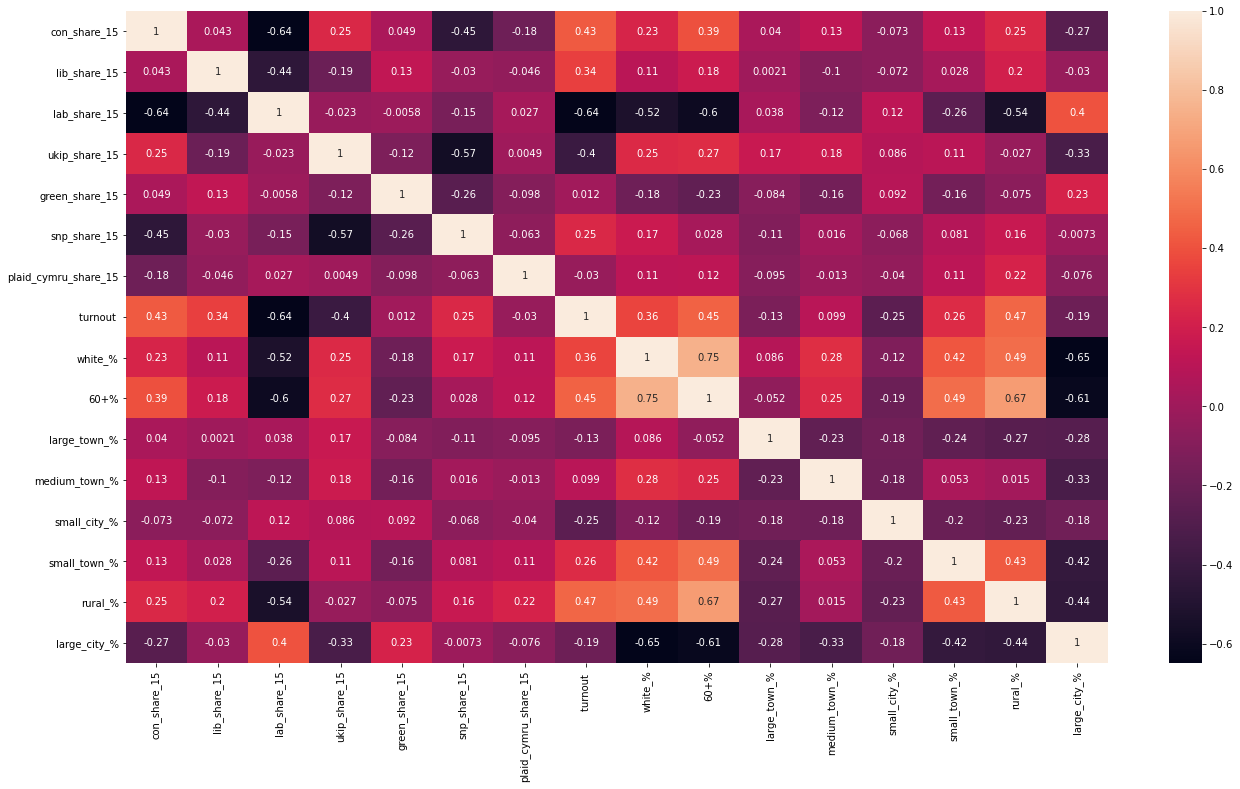

In [221]:
correlations_matrix = numericals.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(22, 12))
ax = sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
#I decided to merge the non white groups, as they were all highly correlated. I could actually drop them, or drop the whites 

In [ ]:
# drop 60+, snp, 4 ethnicity categories, either electorate or residents

In [ ]:
#I'll drop the unneeded columns from the main dataframe

In [222]:
numericals.columns

Index(['con_share_15', 'lib_share_15', 'lab_share_15', 'ukip_share_15',
       'green_share_15', 'snp_share_15', 'plaid_cymru_share_15', 'turnout ',
       'white_%', '60+%', 'large_town_%', 'medium_town_%', 'small_city_%',
       'small_town_%', 'rural_%', 'large_city_%'],
      dtype='object')

In [ ]:
# The correlations are +60, white and rural. 

In [223]:
#let's see how they correlate with the y
corr_ = pd.concat([numericals, y], axis=1)


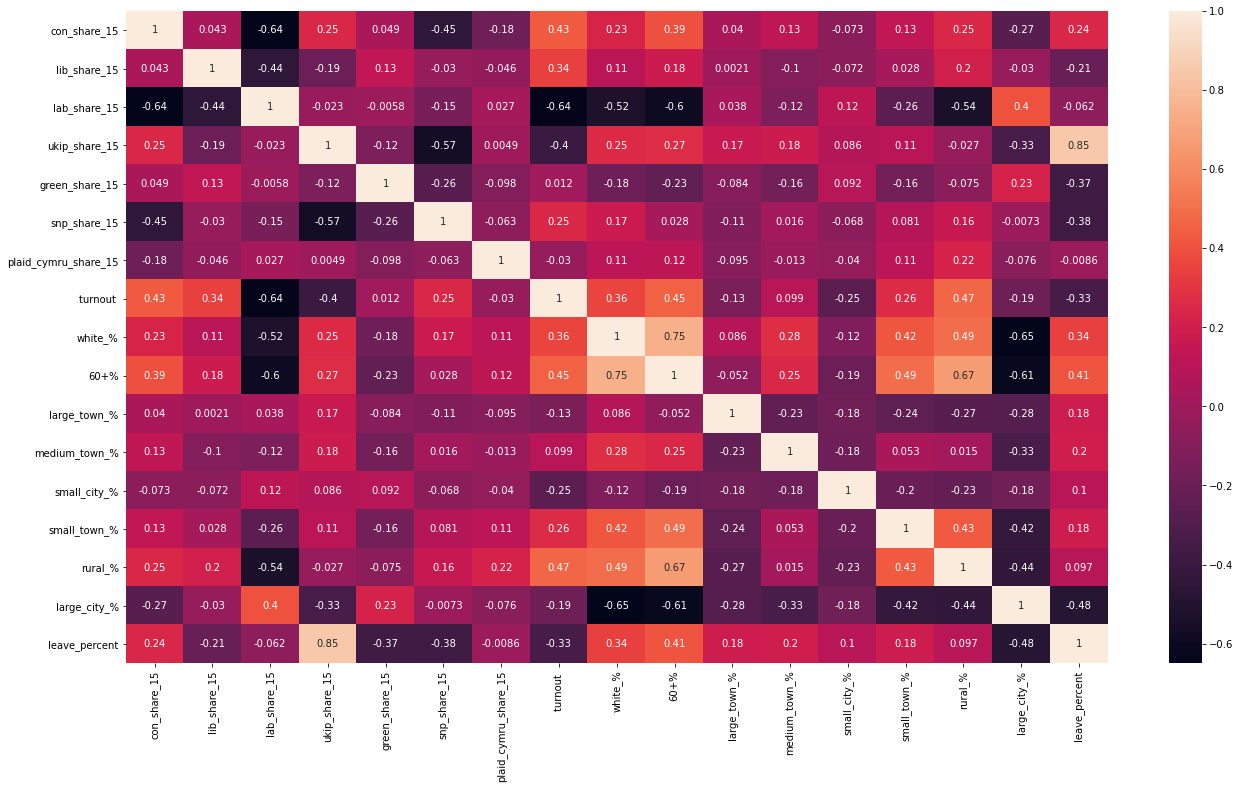

In [224]:
correlations_matrix = corr_.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(22, 12))
ax = sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
#numericals_ = df.select_dtypes(np.number)

In [ ]:
#pd.merge(ethnicity_df
#corr_all = pd.concat([demographics, y], axis=1)

In [ ]:
#correlations_matrix = corr_all.corr()
#mask = np.zeros_like(correlations_matrix)
#mask[np.triu_indices_from(mask)] = True
#fig, ax = plt.subplots(figsize=(22, 12))
#ax = sns.heatmap(correlations_matrix, annot=True)
#plt.show()

In [394]:
qualifications.shape

(628, 10)

In [395]:
qualifications.head()

,No.,Region,Constituency,Press Association ID,Ask Aristotle ID,Working age pop,Percent with no qualifi- cations,% with at least degree/ NVQ4,MP,Party
0,1,Wales,Aberavon,1,664,40000,0.1700,0.2200,Dr Hywel Francis MP,Lab
1,2,Scot,Aberdeen North,2,666,55200,0.1250,0.3804,Mr Frank Doran MP,Lab
2,3,Scot,Aberdeen South,3,667,60400,0.0795,0.4702,Ms Anne Begg MP,Lab
3,4,Scot,Aberdeenshire West and Kincardine,4,1417,54500,0.0550,0.3908,Sir Robert Smith Bt MP,Lib Dems
4,5,Scot,Airdrie and Shotts,5,668,53900,0.2356,0.1855,The Rt Hon Dr John Reid MP,Lab


In [397]:
w = qualifications[qualifications['Region'].str.contains('Wales')]

In [398]:
w.shape

(40, 10)

In [401]:
s = qualifications[qualifications['Region'].str.contains('Scot')]

In [402]:
s.shape

(59, 10)

In [404]:
e = qualifications.loc[(qualifications['Region'] != 'Wales') & (qualifications['Region'] != 'Scot')]

In [405]:
e['Region'].value_counts()

SE        83
NW        76
Lon       74
W Mids    59
Y&H       56
East      56
SW        51
E Mids    44
NE        30
Name: Region, dtype: int64

In [406]:
e.shape

(529, 10)

In [ ]:
dep

In [ ]:
# I am expecting not to have outliers

<AxesSubplot:xlabel='white_%', ylabel='leave_percent'>

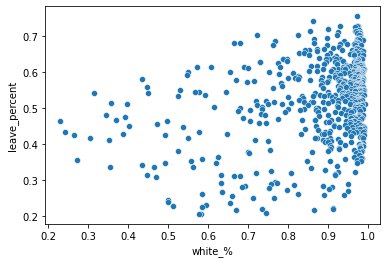

In [228]:
sns.scatterplot(x='white_%', y='leave_percent', hue=None, data=df2_esw) 

<AxesSubplot:xlabel='rural_%', ylabel='leave_percent'>

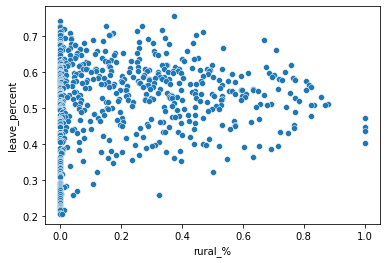

In [229]:
sns.scatterplot(x='rural_%', y='leave_percent', hue=None, data=df2_esw) 

<AxesSubplot:xlabel='60+%', ylabel='leave_percent'>

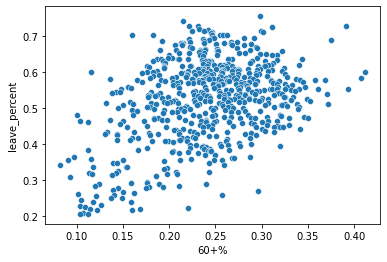

In [231]:
sns.scatterplot(x='60+%', y='leave_percent', hue=None, data=df2_esw)

<AxesSubplot:xlabel='60+%', ylabel='leave_percent'>

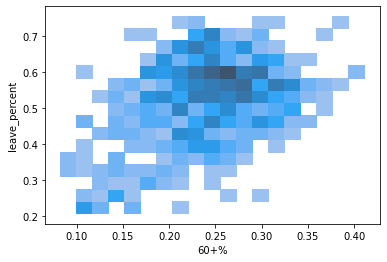

In [334]:
sns.histplot(x='60+%', y='leave_percent', data=df2_esw)

In [232]:
df2_esw['leave_remain'].value_counts()

0    402
1    230
Name: leave_remain, dtype: int64

In [ ]:
# this is quite unbalanced. I'll come back to it later

In [416]:
df3 = df2_esw.merge(qualifications, left_on='constituency',right_on='Constituency', how='outer')

In [423]:
df3.drop(columns={'No.', 
                  'Constituency', 
                  'Press Association ID', 
                  'Ask Aristotle ID',
                  'Region', 
                  'Working age pop',
                  'MP', 
                  'Party'},
        inplace=True)

In [426]:
df3.isna().sum()

ons_id                              176
constituency                        176
leave_percent                       176
county                              176
region                              176
country                             176
electorate                          176
con_share_15                        176
lib_share_15                        176
lab_share_15                        176
ukip_share_15                       176
green_share_15                      176
snp_share_15                        176
plaid_cymru_share_15                176
turnout                             176
white_%                             176
60+%                                176
leave_remain                        176
large_town_%                        176
medium_town_%                       176
small_city_%                        176
small_town_%                        176
rural_%                             176
large_city_%                        176
Percent with no qualifi- cations    180


In [433]:
df3.dropna(how='all', thresh=4, inplace=True)

In [438]:
df3.isna().sum()

ons_id                  0
constituency            0
leave_percent           0
county                  0
region                  0
country                 0
electorate              0
con_share_15            0
lib_share_15            0
lab_share_15            0
ukip_share_15           0
green_share_15          0
snp_share_15            0
plaid_cymru_share_15    0
turnout                 0
white_%                 0
60+%                    0
leave_remain            0
large_town_%            0
medium_town_%           0
small_city_%            0
small_town_%            0
rural_%                 0
large_city_%            0
no_qualifications       0
%_with_a_degree         0
dtype: int64

In [437]:
df3.rename(columns={'Percent with no qualifi- cations': 'no_qualifications',
                   '% with at least degree/ NVQ4': '%_with_a_degree' }, 
           inplace=True)
           


In [436]:
df3 = df3.fillna(0)

In [439]:
df3.loc[df3['%_with_a_degree'] == 0]

,ons_id,constituency,leave_percent,county,region,country,electorate,con_share_15,lib_share_15,lab_share_15,ukip_share_15,green_share_15,snp_share_15,plaid_cymru_share_15,turnout,white_%,60+%,leave_remain,large_town_%,medium_town_%,small_city_%,small_town_%,rural_%,large_city_%,no_qualifications,%_with_a_degree
2,E14000642,Clacton,0.730,Essex,Eastern,England,68936.0,0.366571,0.018368,0.143959,0.444319,0.026783,0.000000,0.0,0.641276,0.974426,0.391461,0.0,0.000000,0.593942,0.000000,0.138072,0.267986,0.000000,0.0,0.0
3,E14000933,South Basildon and East Thurrock,0.730,Essex,Eastern,England,71155.0,0.434014,0.029741,0.252078,0.265326,0.000000,0.000000,0.0,0.640756,0.929247,0.230893,0.0,0.557282,0.288184,0.000000,0.003460,0.151073,0.000000,0.0,0.0
4,E14000771,Kingston upon Hull East,0.728,Humberside,Yorkshire and The Humber,England,65710.0,0.159145,0.065274,0.517300,0.223680,0.022934,0.000000,0.0,0.534835,0.973134,0.221659,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
13,E14000542,Barnsley East,0.710,South Yorkshire,Yorkshire and The Humber,England,69135.0,0.145962,0.031596,0.547265,0.234831,0.000000,0.000000,0.0,0.557127,0.981268,0.245336,0.0,0.130805,0.000000,0.000000,0.694925,0.174271,0.000000,0.0,0.0
18,E14000657,Dagenham and Rainham,0.703,London,London,England,69128.0,0.243717,0.016655,0.414170,0.298490,0.018722,0.000000,0.0,0.622758,0.722137,0.182252,0.0,0.000000,0.000000,0.000000,0.000000,0.002397,0.997603,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,E14000598,"Brighton, Pavilion",0.259,East Sussex,South East,England,76557.0,0.227668,0.027892,0.272588,0.049821,0.418301,0.000000,0.0,0.714187,0.890755,0.140827,1.0,0.000000,0.000000,0.959669,0.000000,0.040331,0.000000,0.0,0.0
614,S14000021,East Renfrewshire,0.257,Scotland,Scotland,Scotland,69982.0,0.219725,0.018844,0.340120,0.015653,0.000000,0.405658,0.0,0.810637,0.940789,0.257361,1.0,0.000000,0.253864,0.000000,0.420893,0.325243,0.000000,0.0,0.0
617,E14000809,"Manchester, Withington",0.249,Greater Manchester,North West,England,74102.0,0.097506,0.239563,0.537225,0.043470,0.081015,0.000000,0.0,0.674287,0.765734,0.136553,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0
618,E14000789,"Lewisham, Deptford",0.244,London,London,England,73428.0,0.148779,0.052650,0.602454,0.042445,0.125079,0.000000,0.0,0.645884,0.498985,0.104310,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0


### 

In [ ]:
#I'll try testing on Merseyside

In [365]:
liv = df2_esw[df2_esw.county.str.contains("Merseyside")]

In [366]:
no_liv = df2_esw[~df2_esw.county.str.contains("Merseyside")]

In [367]:
len(no_liv)

617

In [368]:
liv.columns

Index(['ons_id', 'constituency', 'leave_percent', 'county', 'region',
       'country', 'electorate', 'con_share_15', 'lib_share_15', 'lab_share_15',
       'ukip_share_15', 'green_share_15', 'snp_share_15',
       'plaid_cymru_share_15', 'turnout ', 'white_%', '60+%', 'leave_remain',
       'large_town_%', 'medium_town_%', 'small_city_%', 'small_town_%',
       'rural_%', 'large_city_%'],
      dtype='object')

In [369]:
liv.drop(columns={'ons_id', 
                  'constituency', 
                  'county', 
                  'region',
                  'country'},
        inplace=True)

In [370]:
len(liv)

15

In [371]:
no_liv.drop(columns={'ons_id', 
                  'constituency', 
                  'county', 
                  'region',
                  'country'},
        inplace=True)

In [372]:
no_liv

,leave_percent,electorate,con_share_15,lib_share_15,lab_share_15,ukip_share_15,green_share_15,snp_share_15,plaid_cymru_share_15,turnout,white_%,60+%,leave_remain,large_town_%,medium_town_%,small_city_%,small_town_%,rural_%,large_city_%
0,0.756,67064.0,0.437966,0.023420,0.164794,0.337917,0.018459,0.00000,0.0,0.646233,0.972513,0.298002,0,0.000000,0.626798,0.0,0.000000,0.373202,0.000000
1,0.742,67080.0,0.337689,0.022775,0.390207,0.220210,0.014343,0.00000,0.0,0.549836,0.862822,0.215112,0,0.070641,0.929359,0.0,0.000000,0.000000,0.000000
2,0.730,68936.0,0.366571,0.018368,0.143959,0.444319,0.026783,0.00000,0.0,0.641276,0.974426,0.391461,0,0.000000,0.593942,0.0,0.138072,0.267986,0.000000
3,0.730,71155.0,0.434014,0.029741,0.252078,0.265326,0.000000,0.00000,0.0,0.640756,0.929247,0.230893,0,0.557282,0.288184,0.0,0.003460,0.151073,0.000000
4,0.728,65710.0,0.159145,0.065274,0.517300,0.223680,0.022934,0.00000,0.0,0.534835,0.973134,0.221659,0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,0.216,60169.0,0.078571,0.027409,0.279373,0.013163,0.061860,0.53112,0.0,0.613638,0.865905,0.159411,1,0.000000,0.000000,0.0,0.000000,0.011426,0.988574
628,0.216,73326.0,0.171934,0.080920,0.602409,0.040033,0.102429,0.00000,0.0,0.671440,0.670558,0.122452,1,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
629,0.207,91236.0,0.151858,0.188467,0.356598,0.030210,0.268258,0.00000,0.0,0.703867,0.745196,0.106312,1,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
630,0.205,79137.0,0.251137,0.089941,0.530190,0.032083,0.088539,0.00000,0.0,0.630969,0.581941,0.112196,1,0.000000,0.000000,0.0,0.000000,0.000000,1.000000


In [373]:
no_liv_x = no_liv.drop(columns={'leave_percent',
                               'leave_remain'})

In [375]:
no_liv_y = no_liv['leave_percent']
no_liv_y_cat = no_liv['leave_remain']

In [377]:
liv_x = liv.drop(columns={'leave_percent',
                          'leave_remain'})

In [378]:
liv_y = liv['leave_percent']
liv_y_cat = liv['leave_remain']

In [ ]:
#linear regression 

In [440]:
model = LinearRegression().fit(no_liv_x, no_liv_y)

In [445]:
liv_y_predict = model.predict(liv_x)

<AxesSubplot:ylabel='leave_percent'>

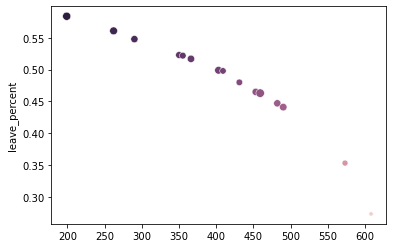

In [484]:
#sns.scatterplot(x=liv_y_predict, y=liv_y)

sns.scatterplot(x=liv_x.index, y=liv['leave_percent'], hue=liv_y, size=liv_y_predict, legend=False)

<AxesSubplot:ylabel='leave_percent'>

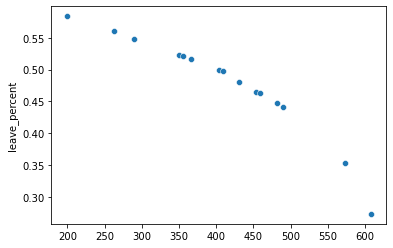

In [485]:
sns.scatterplot(x=liv_x.index, y=liv['leave_percent'],legend=False)

In [448]:
#differnece in variance
mse = mean_squared_error(liv_y, liv_y_predict)
print(mse)

0.0033580417446278077


In [447]:
from sklearn.metrics import mean_squared_error, r2_score

In [449]:
r2 = r2_score(liv_y, liv_y_predict)
print(r2)

0.4386106035622528


In [441]:
#probablity of a given event
model.score(no_liv_x, no_liv_y)

0.8564824678280987

In [486]:
model.score(liv_x, liv_y)

0.4386106035622528

In [450]:
liv_y

199    0.584
262    0.561
290    0.548
350    0.523
355    0.522
366    0.517
403    0.499
409    0.498
431    0.480
453    0.465
459    0.463
482    0.447
490    0.441
573    0.353
608    0.273
Name: leave_percent, dtype: float64

In [451]:
liv_y_predict

array([0.57137682, 0.54324578, 0.49100848, 0.46446437, 0.44989303,
       0.50209155, 0.52870296, 0.43337559, 0.44200382, 0.49618642,
       0.60396299, 0.49455887, 0.51428318, 0.39785401, 0.30146644])

In [ ]:
#logistic regression 

In [383]:
logreg = LogisticRegression()
logreg.fit(no_liv_x, no_liv_y_cat)
y_pred = logreg.predict(liv_x)
print ('\nAccuracy of logistic regression classifier on test set: {:.2F}'.format(logreg.score(liv_x, liv_y_cat)))
print('\n',confusion_matrix(liv_y_cat,y_pred))


Accuracy of logistic regression classifier on test set: 0.40

 [[6 0]
 [9 0]]


In [389]:
def sample_all (x, y):
    
    #Random OverSampler
    ros = RandomOverSampler()
    X = x
    X_ros, y_ros = ros.fit_sample(X, y)
    
    classification = LogisticRegression(random_state=0, solver='lbfgs',
                                        multi_class='ovr').fit(X_ros, y_ros)
    print('\n\n\nRandom Oversampling Classification Score:', classification.score(X_ros, y_ros))

In [390]:
sample_all (no_liv_x, no_liv_y_cat)




Random Oversampling Classification Score: 0.7159090909090909


In [ ]:
#I'll run a model on my raw data 

In [ ]:
'''from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(numericals, y)
predictions  = model.predict(numericals)'''

In [ ]:
#i'll run a logistic regression model (on my categorical columns)

In [233]:
from sklearn.linear_model  import LogisticRegression

In [234]:
logreg = LogisticRegression(solver= 'lbfgs')

In [235]:
from sklearn.model_selection import cross_val_score

In [236]:
#On my raw numerical data I get an accuracy of 70%. Real split is 63% leave
#now I think it is guessing they are all leave 
#I have 82
cross_val_score(logreg, numericals, y_log, cv=5, scoring='accuracy').mean()

0.8151731033620798

In [254]:
#includidn categoricals doesn't change anything
cross_val_score(logreg, X, y_log, cv=5, scoring='accuracy').mean()

0.8135733033370828

In [238]:
#demographics alone is exactly the same. Not sure what that means
#cross_val_score(logreg, demographics, y_log, cv=5, scoring='accuracy').mean()

In [ ]:
#on voting behaviour in 2015 accuracy is 78%
#Scaling the data improved the accuracy to 88%
#cross_val_score(logreg, scaled_data, y_log, cv=5, scoring='accuracy').mean()

In [240]:
y_log.value_counts(normalize=True)

0    0.636076
1    0.363924
Name: leave_remain, dtype: float64

In [ ]:
# i need to encode my categoricals

In [241]:
categoricals

,county,region,country
0,Lincolnshire,East Midlands,England
1,West Midlands,West Midlands,England
2,Essex,Eastern,England
3,Essex,Eastern,England
4,Humberside,Yorkshire and The Humber,England
...,...,...,...
627,Scotland,Scotland,Scotland
628,London,London,England
629,Avon,South West,England
630,London,London,England


In [ ]:
df2['region'].value_counts()

In [242]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(sparse=False)

In [243]:
categoricals['region']= ohe.fit_transform(categoricals[['region']])

In [244]:
categoricals['country']= ohe.fit_transform(categoricals[['country']])

In [250]:
#ohe.fit_transform(categoricals[['county']])

#there are too many counties and they are too imbalanced to encode. I will just use the regions for now.
categoricals= categoricals.drop(columns={'county'})

In [251]:
categoricals

,region,country
0,1.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
627,0.0,0.0
628,0.0,1.0
629,0.0,1.0
630,0.0,1.0


In [ ]:
#I will put them back together and hope for the best  

In [252]:
X = pd.concat([categoricals, numericals], axis=1)

In [253]:
df_all= pd.concat([X, y, y_log], axis=1)

In [255]:
df_all

,region,country,con_share_15,lib_share_15,lab_share_15,ukip_share_15,green_share_15,snp_share_15,plaid_cymru_share_15,turnout,white_%,60+%,large_town_%,medium_town_%,small_city_%,small_town_%,rural_%,large_city_%,leave_percent,leave_remain
0,1.0,1.0,0.437966,0.023420,0.164794,0.337917,0.018459,0.00000,0.0,0.646233,0.972513,0.298002,0.000000,0.626798,0.0,0.000000,0.373202,0.000000,0.756,0
1,0.0,1.0,0.337689,0.022775,0.390207,0.220210,0.014343,0.00000,0.0,0.549836,0.862822,0.215112,0.070641,0.929359,0.0,0.000000,0.000000,0.000000,0.742,0
2,0.0,1.0,0.366571,0.018368,0.143959,0.444319,0.026783,0.00000,0.0,0.641276,0.974426,0.391461,0.000000,0.593942,0.0,0.138072,0.267986,0.000000,0.730,0
3,0.0,1.0,0.434014,0.029741,0.252078,0.265326,0.000000,0.00000,0.0,0.640756,0.929247,0.230893,0.557282,0.288184,0.0,0.003460,0.151073,0.000000,0.730,0
4,0.0,1.0,0.159145,0.065274,0.517300,0.223680,0.022934,0.00000,0.0,0.534835,0.973134,0.221659,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.728,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,0.0,0.0,0.078571,0.027409,0.279373,0.013163,0.061860,0.53112,0.0,0.613638,0.865905,0.159411,0.000000,0.000000,0.0,0.000000,0.011426,0.988574,0.216,1
628,0.0,1.0,0.171934,0.080920,0.602409,0.040033,0.102429,0.00000,0.0,0.671440,0.670558,0.122452,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.216,1
629,0.0,1.0,0.151858,0.188467,0.356598,0.030210,0.268258,0.00000,0.0,0.703867,0.745196,0.106312,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.207,1
630,0.0,1.0,0.251137,0.089941,0.530190,0.032083,0.088539,0.00000,0.0,0.630969,0.581941,0.112196,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.205,1


In [ ]:
df_all.dtypes 

In [ ]:
#now I will split into test and train and run some models

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [272]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [ ]:
#Linear regression

In [275]:
model = LinearRegression().fit(x_train, y_train)
model.intercept_


0.9326076047138675

In [276]:
model.coef_

array([ 0.01639667,  0.02017519,  0.11994609,  0.05034508,  0.10992676,
        1.17019758, -0.71793204,  0.11429779, -0.02673859, -0.42711971,
       -0.0215039 ,  0.46871602, -0.44339448, -0.46490692, -0.43666465,
       -0.44664352, -0.43703182, -0.4867904 ])

In [277]:
model.score(x_train, y_train)


0.8500708978731445

In [278]:

model.score(x_test, y_test)

0.8620735430260889

In [319]:
urban_leave = df2_esw.loc[((df2_esw['large_city_%'] > 0) | (df2_esw['small_city_%'] > 0)) & (df2_esw['leave_remain'] == 0)]

In [321]:
urban_leave.loc[(urban_leave['region'] == 'North West')]

,ons_id,constituency,leave_percent,county,region,country,electorate,con_share_15,lib_share_15,lab_share_15,ukip_share_15,green_share_15,snp_share_15,plaid_cymru_share_15,turnout,white_%,60+%,leave_remain,large_town_%,medium_town_%,small_city_%,small_town_%,rural_%,large_city_%
94,E14000579,Bolton South East,0.630,Greater Manchester,North West,England,69687.0,0.203446,0.026311,0.504504,0.236286,0.029453,0.0,0.0,0.584657,0.729899,0.193264,0,0.003916,0.294541,0.488673,0.210961,0.001910,0.000000
114,E14000537,Ashton-under-Lyne,0.618,Greater Manchester,North West,England,68343.0,0.221234,0.024230,0.497610,0.217586,0.039339,0.0,0.0,0.569451,0.873514,0.223412,0,0.004311,0.508536,0.000000,0.467956,0.003434,0.015762
135,E14000661,Denton and Reddish,0.610,Greater Manchester,North West,England,66141.0,0.236550,0.024741,0.508286,0.186784,0.037900,0.0,0.0,0.584826,0.943925,0.233365,0,0.066061,0.405673,0.000000,0.147553,0.000000,0.380713
170,E14001054,Worsley and Eccles South,0.598,Greater Manchester,North West,England,72177.0,0.300942,0.026161,0.442352,0.182839,0.029538,0.0,0.0,0.582568,0.940581,0.212985,0,0.000000,0.321478,0.237618,0.436731,0.004172,0.000000
206,E14000578,Bolton North East,0.581,Greater Manchester,North West,England,67895.0,0.328167,0.028637,0.429578,0.188063,0.025555,0.0,0.0,0.635702,0.825319,0.225338,0,0.000000,0.000000,0.996592,0.000000,0.003408,0.000000
271,E14000580,Bolton West,0.556,Greater Manchester,North West,England,72719.0,0.406322,0.040068,0.389838,0.152865,0.000000,0.0,0.0,0.668216,0.931445,0.248884,0,0.000000,0.155970,0.293252,0.456977,0.093802,0.000000
290,E14000581,Bootle,0.548,Merseyside,North West,England,70145.0,0.080594,0.021660,0.744574,0.108855,0.033243,0.0,0.0,0.643695,0.975947,0.227502,0,0.000000,0.808196,0.000000,0.188776,0.000000,0.003028
296,E14000612,Bury South,0.545,Greater Manchester,North West,England,73883.0,0.346288,0.035794,0.450535,0.133411,0.030372,0.0,0.0,0.639051,0.901423,0.225862,0,0.098204,0.314560,0.000000,0.232104,0.046225,0.308907
350,E14000775,Knowsley,0.523,Merseyside,North West,England,79108.0,0.066374,0.029372,0.781186,0.098033,0.025035,0.0,0.0,0.641250,0.977500,0.226993,0,0.000000,0.421109,0.000000,0.000000,0.002972,0.575919
355,E14000794,"Liverpool, Walton",0.522,Merseyside,North West,England,61908.0,0.046923,0.023410,0.813009,0.089707,0.024894,0.0,0.0,0.620324,0.951260,0.206175,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:xlabel='large_town_%', ylabel='leave_percent'>

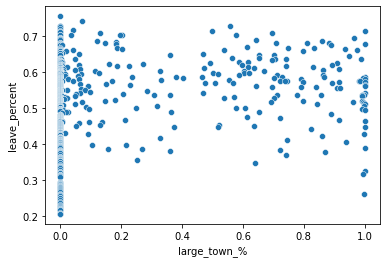

In [332]:
sns.scatterplot(x='large_town_%', y='leave_percent', hue=None, data=df2_esw) 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542,Note: constituency deprivation figures have be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,Source: Department for Communities and Local G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#I will try with the leave_remain variable

In [310]:
xtrain, x_test, Y_train, Y_test = train_test_split(X, y_log)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print ('\nAccuracy of logistic regression classifier on test set: {:.2F}'.format(logreg.score(x_test,y_test)))
print('\n',confusion_matrix(y_test,y_pred))

In [281]:
y_log.value_counts()

0    402
1    230
Name: leave_remain, dtype: int64

In [287]:
y_log.astype(discrete)

dtype('int64')

In [ ]:
#random forest

In [299]:
X.dtypes

region                  float64
country                 float64
con_share_15            float64
lib_share_15            float64
lab_share_15            float64
ukip_share_15           float64
green_share_15          float64
snp_share_15            float64
plaid_cymru_share_15    float64
turnout                 float64
white_%                 float64
60+%                    float64
large_town_%            float64
medium_town_%           float64
small_city_%            float64
small_town_%            float64
rural_%                 float64
large_city_%            float64
dtype: object

In [307]:
y_log= y_log.astype('category')

In [308]:
y_log.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_train, y_train)
print('\n',confusion_matrix(y_test,y_pred))

In [ ]:
#I will see what happens with a decision tree

In [293]:
from sklearn import tree
from sklearn.tree import plot_tree 
from sklearn.tree import DecisionTreeClassifier

AttributeError: can't set attribute

In [296]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
dt_x = pd.DataFrame(data= X_scale)
dt_y = pd.DateFrame(data=log_y)

#had an epiphany. There is no point tweaking my data because this is a one time event. There is no out the box data...the only thing that could change is 

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y_log)

clf = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(x, y_log)


In [ ]:
clf.predict(x, y_log)

In [ ]:
tree.plot_tree(clf, )